# Data Loading

In [1]:
import sqlite3
import pandas as pd
import numpy as np

connection = sqlite3.connect('../videos_database.db')
cursor = connection.cursor()

cursor.execute('''
select *
from videos_metadata_full
''')
column_names = [description[0] for description in cursor.description]
video_data = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data.shape[0]))
video_data = video_data.drop_duplicates(subset=['video_id'], keep='last')
print('Number of videos after dropping duplicates: {}'.format(video_data.shape[0]))

Number of videos before dropping duplicates: 5084
Number of videos after dropping duplicates: 5084


In [2]:
cursor.execute('''
select *
from videos_metadata_full_face_recognition vm
''')
column_names = [description[0] for description in cursor.description]
video_data_face = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data_face.shape[0]))
video_data_face = video_data_face.drop_duplicates(subset=['video_id'])
print('Number of videos after dropping duplicates: {}'.format(video_data_face.shape[0]))

Number of videos before dropping duplicates: 5068
Number of videos after dropping duplicates: 5068


In [3]:
cursor.execute('''
select *
from videos_metadata_full_kid_man_woman_recognition vm
''')
column_names = [description[0] for description in cursor.description]
video_data_kid_man_woman = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data_kid_man_woman.shape[0]))
video_data_kid_man_woman = video_data_kid_man_woman.drop_duplicates(subset=['video_id'])
print('Number of videos after dropping duplicates: {}'.format(video_data_kid_man_woman.shape[0]))

Number of videos before dropping duplicates: 5068
Number of videos after dropping duplicates: 5068


In [4]:
cursor.execute('''
select *
from videos_metadata_full_text_recognition vm
''')
column_names = [description[0] for description in cursor.description]
video_data_text = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data_text.shape[0]))
video_data_text = video_data_text.drop_duplicates(subset=['video_id'])
print('Number of videos after dropping duplicates: {}'.format(video_data_text.shape[0]))

Number of videos before dropping duplicates: 5068
Number of videos after dropping duplicates: 5068


In [5]:
cursor.execute('''
select *
from videos_metadata_full_coco_recognition vm
''')
column_names = [description[0] for description in cursor.description]
video_data_coco = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data_coco.shape[0]))
video_data_coco = video_data_coco.drop_duplicates(subset=['video_id'])
print('Number of videos after dropping duplicates: {}'.format(video_data_coco.shape[0]))

Number of videos before dropping duplicates: 5068
Number of videos after dropping duplicates: 5068


In [6]:
video_data_coco_columns = video_data_coco.drop('video_id', axis=1).columns
# video_data_coco[video_data_coco_columns] = video_data_coco[video_data_coco_columns].fillna(0)
video_data_coco[video_data_coco_columns] = np.where(video_data_coco[video_data_coco_columns] > 0.6, 1, 0)

In [7]:
cursor.execute('''
select *
from videos_metadata_all_features
''')
column_names = [description[0] for description in cursor.description]
video_data_features = pd.DataFrame(cursor.fetchall(), columns=column_names)
print('Number of videos before dropping duplicates: {}'.format(video_data_features.shape[0]))
video_data_features = video_data_features.drop_duplicates(subset=['video_id'])
print('Number of videos after dropping duplicates: {}'.format(video_data_features.shape[0]))

Number of videos before dropping duplicates: 5068
Number of videos after dropping duplicates: 5068


In [8]:
video_data_features = video_data_features[['video_id', 'avg_brightness', 'avg_motion', 'cut_rate', 'entropy',
       'music_non_music', 'tempo', 'loudness', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'quality_score', 'snr', 'harmonicity', 'dyn_range',
       'centroid', 'clipping']].copy()

In [9]:
video_data_features

,video_id,avg_brightness,avg_motion,cut_rate,entropy,music_non_music,tempo,loudness,mfcc_1,mfcc_2,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,quality_score,snr,harmonicity,dyn_range,centroid,clipping
0,7488037420731059499,110.122672,2.148118,0.000000,7.204612,Music,161.499023,0.023242,-249.022705,100.718079,...,8.490293,3.697615,3.803981,-2.257645,216.332812,23.662889,0.660976,0.181433,2090.654613,0.000009
1,7476682375007685931,128.613537,1.075331,0.000000,7.398479,Music,99.384014,0.151145,-126.262299,95.734146,...,6.982800,0.151920,3.135674,-2.185694,217.014563,29.243212,0.359520,1.553173,2078.590591,0.000009
2,7479460137074347310,106.977847,2.425806,0.556769,7.472828,Music,117.453835,0.032268,-261.303650,72.094116,...,8.729190,-7.059931,7.135955,-6.520561,235.838599,35.738437,0.192419,0.635752,2249.514318,0.000009
3,7474948817524149546,119.262394,1.315218,0.000000,7.351712,Music,135.999178,0.058259,-183.208954,79.133766,...,6.124158,-2.278548,5.104350,-5.609164,280.115252,20.674551,0.434813,0.610063,2737.039103,0.000009
4,7475915526070439214,81.361074,0.918707,0.000000,7.249886,Non Music,143.554688,0.132960,-256.671417,149.679581,...,-3.525663,-14.363482,-2.073953,-3.108175,87.684659,38.964691,0.877907,1.063153,756.070383,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,7488143895705144622,104.944320,2.854193,0.000000,6.982522,Non Music,161.499023,0.075507,-178.950806,114.769165,...,15.575876,-0.012913,6.560015,-1.526069,176.782907,30.288141,0.460121,0.749238,1674.545908,0.000009
5064,7507401898375318790,112.118579,1.834890,0.529954,7.279675,Music,99.384014,0.044432,-286.879272,121.851036,...,-0.218344,1.421002,1.718848,-0.970409,164.399991,36.800025,0.736431,0.684932,1530.757054,0.000027
5065,7485286417833151786,99.903926,2.112939,0.601173,7.681851,Music,112.347147,0.110394,-194.225922,102.149529,...,6.364104,-3.099412,1.027016,-1.654151,173.179085,28.908262,0.425700,1.276456,1641.661710,0.000018
5066,7496164203254828318,117.319298,1.791200,0.406504,7.718301,Non Music,135.999178,0.023340,-360.288116,101.765060,...,-1.534135,-14.227228,-3.422370,-7.576814,188.842881,36.447396,0.507236,0.518450,1777.035228,0.000009


In [10]:
import os

formatted_videos = [x.replace('.mp4', '') for x in os.listdir('../parsing/formatted_videos')]

In [11]:
video_data = video_data.merge(video_data_face, on=['video_id'], how='left')
video_data = video_data.merge(video_data_kid_man_woman, on=['video_id'], how='left')
video_data = video_data.merge(video_data_text, on=['video_id'], how='left')
video_data = video_data.merge(video_data_coco, on=['video_id'], how='left')
video_data = video_data.merge(video_data_features, on=['video_id'], how='left')
# video_data = video_data.merge(videos_audio_quality_features, on=['video_id'], how='left')

# Other (to delete)

In [123]:
import cv2
import numpy as np
import pytesseract
from skimage.measure import shannon_entropy

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Настройки для оптимизации
TESSERACT_CONFIG = '--oem 1 --psm 6'  # Быстрый режим OCR
FRAMES_FOR_DOMINANT_COLORS = 5  # Уменьшили количество кадров для анализа цветов
CUT_DETECTION_THRESHOLD = 0.8  # Порог для определения склейки
SKIP_FRAMES = 2  # Пропуск кадров для ускорения обработки

def extract_video_features(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Не удалось открыть видеофайл: {video_path}")
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps
    
    # Инициализация переменных
    brightness_values = []
    motion_values = []
    cut_count = 0
    prev_frame = None
    prev_hist = None
    text_presence = 0
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        if frame_count % (SKIP_FRAMES + 1) != 0:
            continue  # Пропускаем кадры для ускорения
        
        # Быстрое преобразование в оттенки серого
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Яркость (используем более быстрый метод)
        brightness = cv2.mean(gray)[0]
        brightness_values.append(brightness)
        
        # Оптический поток (только если есть предыдущий кадр)
        if prev_frame is not None:
            # Уменьшаем разрешение для ускорения расчета оптического потока
            small_prev = cv2.resize(prev_frame, None, fx=0.5, fy=0.5)
            small_curr = cv2.resize(gray, None, fx=0.5, fy=0.5)
            
            flow = cv2.calcOpticalFlowFarneback(
                small_prev, small_curr, None, 
                pyr_scale=0.5, levels=3, winsize=10, 
                iterations=2, poly_n=5, poly_sigma=1.1, flags=0
            )
            motion = np.mean(np.abs(flow))
            motion_values.append(motion)
        
        # Детекция склеек (упрощенный метод)
        hist = cv2.calcHist([gray], [0], None, [64], [0, 256])  # Меньше бинов для скорости
        cv2.normalize(hist, hist)  # Нормализация для сравнения
        
        if prev_hist is not None:
            diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CORREL)
            if diff < CUT_DETECTION_THRESHOLD:
                cut_count += 1
        
        prev_hist = hist
        prev_frame = gray
    
    cap.release()
    
    # Подготовка результата
    result = {
        "fps": fps,
        "avg_brightness": np.mean(brightness_values) if brightness_values else 0,
        "avg_motion": np.mean(motion_values) if motion_values else 0,
        "cut_rate": cut_count / duration if duration > 0 else 0,
        "entropy": shannon_entropy(gray) if 'gray' in locals() else 0,
    }
    
    return result

In [ ]:
# Video almost without moving and without splices
video_ = '7499967577209277739'
video_path = '../parsing/downloaded_tiktoks/{}.mp4'.format(video_)

extract_video_features(video_path)

In [ ]:
7478761602968194347

In [ ]:
# Video with frequently moving and with splices
video_ = '7478761602968194347'
video_path = '../parsing/downloaded_tiktoks/{}.mp4'.format(video_)

extract_video_features(video_path)

In [ ]:
# Video without splices and motion
video_ = '7478779995641416991'
video_path = '../parsing/downloaded_tiktoks/{}.mp4'.format(video_)

extract_video_features(video_path)

In [ ]:
# Video with splices
video_ = '7479188915891473695'
video_path = '../parsing/downloaded_tiktoks/{}.mp4'.format(video_)

extract_video_features(video_path)

In [ ]:
# Video with frequently moving and with splices
video_ = '7478718562123746606'
video_path = '../parsing/downloaded_tiktoks/{}.mp4'.format(video_)

extract_video_features(video_path)

In [ ]:
video_data_anlz = video_data.copy()

In [ ]:
video_data_anlz['createTime'] = pd.to_datetime(video_data_anlz['createTime'], unit='s')

In [ ]:
video_data_anlz['createDate'] = video_data_anlz['createTime'].dt.date
video_data_anlz['createDate'] = pd.to_datetime(video_data_anlz['createDate'])

In [ ]:
video_data_anlz = video_data_anlz.set_index('createDate')

In [ ]:
pd.DataFrame(video_data_anlz.groupby('video_theme').resample('1W')['playCount'].mean()).reset_index().pivot_table(index='createDate', columns='video_theme', values='playCount', aggfunc='mean')#.plot(kind='line')

In [ ]:
pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

In [ ]:
len(['North', 'South', 'East', 'West'] * 91 + ['North'])

In [ ]:
video_data_anlz['music_']

In [ ]:
video_data_anlz

In [ ]:
video_data_anlz['music_platform'].clip(upper=1).fillna(0).value_counts()

In [ ]:
video_data_anlz[video_data_anlz['video_id'] == '7488037420731059499']['music_authorName']

In [ ]:
video_data_anlz[video_data_anlz['video_id'] == '7488037420731059499']['author_nickname']

In [ ]:
video_data_anlz[video_data_anlz['video_id'] == '7475915526070439214']['music_authorName']

In [ ]:
video_data_anlz[video_data_anlz['video_id'] == '7475915526070439214']['author_nickname']

In [ ]:
video_data_anlz[video_data_anlz['music_platform'].isnull() == True].shape[0]

In [ ]:
video_data_anlz['music_applemusic'].value_counts()

In [ ]:
video_data_anlz['music_isCopyrighted'].value_counts()

In [ ]:
video_data_anlz[video_data_anlz['music_isCopyrighted']].shape[0]

In [ ]:
video_data_anlz.pivot_table(index='createDate', columns='video_theme', values='playCount', aggfunc='mean')

In [ ]:
7478330324473089310

In [ ]:
7478563548642168106

In [ ]:
7478718562123746606

# Data Analysis, Preprocessing & Outliers Detection

In [12]:
nulls = video_data.isnull().sum()
nulls[nulls > 0]

video_volumeInfo_Loudness    10
video_volumeInfo_Peak        10
video_theme                  55
parsingTime                  55
video_url                    10
                             ..
snr                          16
harmonicity                  16
dyn_range                    16
centroid                     16
clipping                     16
Length: 155, dtype: int64

In [13]:
nulls[nulls > 0] / video_data.shape[0]

video_volumeInfo_Loudness    0.001967
video_volumeInfo_Peak        0.001967
video_theme                  0.010818
parsingTime                  0.010818
video_url                    0.001967
                               ...   
snr                          0.003147
harmonicity                  0.003147
dyn_range                    0.003147
centroid                     0.003147
clipping                     0.003147
Length: 155, dtype: float64

## Handling NaN Values

Drop data with null video category

In [14]:
video_data = video_data.drop(video_data[video_data['video_categoryType'].isnull() == True].index, axis=0)

In [15]:
nulls = video_data.isnull().sum()
nulls[nulls > 0]

video_theme                    45
parsingTime                    45
video_subtitles_languages    2557
video_subtitles_avg_size     2557
claInfo_enableAutoCaption       5
                             ... 
snr                             6
harmonicity                     6
dyn_range                       6
centroid                        6
clipping                        6
Length: 124, dtype: int64

Handling missin `video_theme`

In [16]:
for categoryType in video_data['video_categoryType'].unique():
    if categoryType == 0:
        continue
    category = video_data[video_data['video_categoryType'] == categoryType]['video_theme'].value_counts().index[0]
    video_data.loc[(video_data['video_categoryType'] == categoryType) & (video_data['video_theme'].isnull() == True), 'video_theme'] = category

In [17]:
categories_to_rename = {
    'Пение и танцы': 'Singing and dancing',
    'Аниме и комиксы': 'Anime and comics',
    'Модные образы': 'Fashionable looks',
    'Юмор': 'Humor',
    'Еда': 'Food',
    'Шоу': 'Show',
    'Отношения': 'Relationship',
    'Машины': 'Cars',
    'Драма': 'Drama',
    'Красота и уход': 'Beauty and care',
    'Липсинк': 'LipSync',
    'Семья': 'Family',
    'Образование': 'Education',
    'Спорт': 'Sport',
    'Повседневность': 'Everyday life',
    'Животные': 'Animals',
    'Технологии': 'Technologies',
    'Фитнес и здоровье': 'Fitness and health',
    'Общество': 'Society',
    'Игры': 'Games'
}

video_data['video_theme'] = video_data['video_theme'].map(categories_to_rename)

In [18]:
datetime_features = ['createTime', 'insertTime']

video_numeric_features = [
    'playCount', 'commentCount', 'collectCount', 'shareCount', 'author_verified', 'author_followerCount',
    'author_followingCount', 'author_videoCount', 'video_duration', 'video_volumeInfo_Loudness',
    'video_volumeInfo_Peak', 'video_categoryType', 'music_duration', 'music_isCopyrighted', 'music_original'
]

video_object_features = ['author_nickname', 'video_theme', 'music_authorName']

extracted_video_features = ['fps', 'avg_brightness', 'avg_motion', 'cut_rate', 'entropy']
extracted_audio_numbers_features = ['tempo', 'loudness'] + [x for x in video_data.columns if 'mcc' in x]
extracted_audio_cat_features = ['music_non_music']

In [19]:
nulls = video_data.isnull().sum()
nulls[nulls > 0]

parsingTime                    45
video_subtitles_languages    2557
video_subtitles_avg_size     2557
claInfo_enableAutoCaption       5
claInfo_hasOriginalAudio        5
                             ... 
snr                             6
harmonicity                     6
dyn_range                       6
centroid                        6
clipping                        6
Length: 123, dtype: int64

`video_subtitles_languages`

In [20]:
video_data['video_subtitles_languages'] = video_data['video_subtitles_languages'].fillna(0)
video_data['video_subtitles_avg_size'] = video_data['video_subtitles_avg_size'].fillna(0)

`claInfo_noCaptionReason`

In [21]:
video_data['claInfo_noCaptionReason'] = video_data['claInfo_noCaptionReason'].fillna(0)

In [22]:
nulls = video_data.isnull().sum()
nulls[nulls > 0]

parsingTime                  45
claInfo_enableAutoCaption     5
claInfo_hasOriginalAudio      5
music_authorName              6
music_duration                3
                             ..
snr                           6
harmonicity                   6
dyn_range                     6
centroid                      6
clipping                      6
Length: 120, dtype: int64

`claInfo_noCaptionReason`

In [23]:
video_data['claInfo_enableAutoCaption'] = video_data['claInfo_enableAutoCaption'].fillna(0)

`claInfo_hasOriginalAudio`

In [24]:
video_data['claInfo_hasOriginalAudio'] = video_data['claInfo_hasOriginalAudio'].fillna(0)

`music_duration`

In [25]:
video_data['music_duration'] = video_data['music_duration'].fillna(0)

In [26]:
video_data['music_album'].value_counts()

music_album
Anxiety                     30
Funny                       16
Monkeys Spinning Monkeys    15
Ehhthang Ehhthang           15
MALA MÍA                    13
                            ..
Boy Meets World              1
Bad Hair Day                 1
the cat from ipanema         1
Iron Man 2                   1
MILLION DOLLAR 4.0           1
Name: count, Length: 610, dtype: int64

In [27]:
video_data['music_musicAuthorName'].value_counts()

music_musicAuthorName
Doechii               31
Franklin Saint        21
Daniel’s inside       18
CRISTIAN HD           17
Gold-Tiger            15
                      ..
the dancing monkey     1
g in fourth gear       1
lyricscentral          1
Hulett Brothers        1
SUSAKI BEATS           1
Name: count, Length: 3519, dtype: int64

`music_applemusic`

In [28]:
video_data['music_applemusic'] = video_data['music_applemusic'].fillna(0)

`music_platform`

In [29]:
video_data = video_data.drop(['music_platform'], axis=1)

`music_platforms`

In [30]:
video_data['music_platforms'] = video_data['music_platforms'].fillna(0)

In [31]:
video_data = video_data.dropna(subset=['face'])

In [32]:
nulls = video_data.isnull().sum()
nulls[nulls > 0]

parsingTime           45
music_authorName       6
music_album         4103
dtype: int64

In [33]:
numeric_nulls = video_data.select_dtypes(exclude=['object']).isnull().sum()
numeric_fillna = numeric_nulls[numeric_nulls>0].index

In [34]:
video_data

,video_id,createTime,playCount,commentCount,collectCount,shareCount,diggCount,author_nickname,author_id,author_uniqueid,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,quality_score,snr,harmonicity,dyn_range,centroid,clipping
0,7488037420731059499,1743444631,29300000,16700,293000,447700,5200000,Sammy,6700308861284582405,samanthakuruc,...,8.490293,3.697615,3.803981,-2.257645,216.332812,23.662889,0.660976,0.181433,2090.654613,0.000009
1,7476682375007685931,1740800798,22100000,15800,123000,41800,1600000,Cale Brown,6807286701384680453,calebrownn,...,6.982800,0.151920,3.135674,-2.185694,217.014563,29.243212,0.359520,1.553173,2078.590591,0.000009
2,7479460137074347310,1741447543,21300000,30900,36800,96100,974100,LosNegrete,6776434903045587973,losnegretefam,...,8.729190,-7.059931,7.135955,-6.520561,235.838599,35.738437,0.192419,0.635752,2249.514318,0.000009
3,7474948817524149546,1740397258,32200000,6159,35300,11500,1200000,Natti Natasha,6519601846326137856,nattinatasha,...,6.124158,-2.278548,5.104350,-5.609164,280.115252,20.674551,0.434813,0.610063,2737.039103,0.000009
4,7475915526070439214,1740622255,22100000,10200,347800,136900,3400000,reddek.mccaul,7091788427524342826,reddek.mccaul,...,-3.525663,-14.363482,-2.073953,-3.108175,87.684659,38.964691,0.877907,1.063153,756.070383,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,7488143895705144622,1743469396,1300000,2924,32800,125600,385900,Hyte,6936303135849726981,hytebrand,...,15.575876,-0.012913,6.560015,-1.526069,176.782907,30.288141,0.460121,0.749238,1674.545908,0.000009
5080,7507401898375318790,1747953221,1000000,421,17800,3301,76800,nevaaadaa,6584048047255601158,nevaaadaa,...,-0.218344,1.421002,1.718848,-0.970409,164.399991,36.800025,0.736431,0.684932,1530.757054,0.000027
5081,7485286417833151786,1742804178,1000000,20,988,407,3742,FUNCAT-Global,7310141169371808814,funcat_global,...,6.364104,-3.099412,1.027016,-1.654151,173.179085,28.908262,0.425700,1.276456,1641.661710,0.000018
5082,7496164203254828318,1745336771,1700000,231,2721,549,33200,MAGICJOHN.OFFICIAL,7310483997769860142,magicjohn.official,...,-1.534135,-14.227228,-3.422370,-7.576814,188.842881,36.447396,0.507236,0.518450,1777.035228,0.000009


In [35]:
video_data[numeric_fillna] = video_data[numeric_fillna].fillna(0)

## Data Analysis & Outliers Detection

`playCount` - target variable

In [36]:
video_data['playCount'].mean()

16694934.175217047

In [37]:
video_data['playCount'].min(), video_data['playCount'].max()

(44700, 157500000)

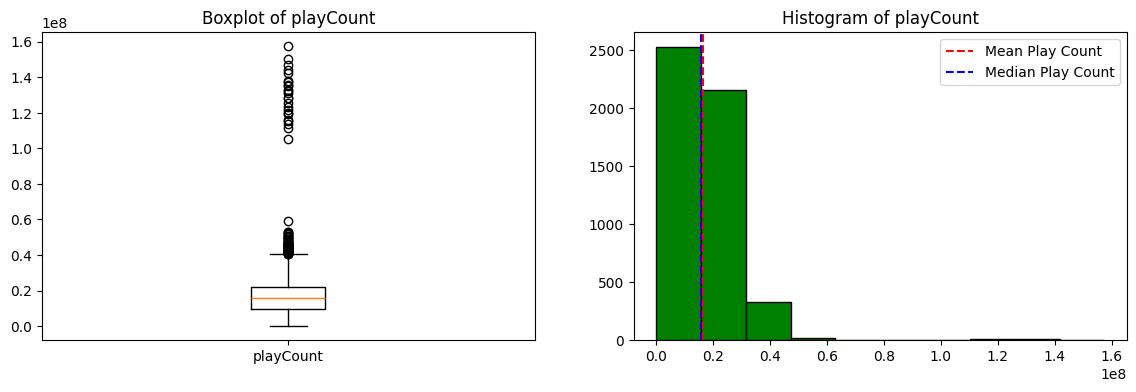

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['playCount'].values);
axs[0].set_title('Boxplot of playCount')
axs[0].set_xticklabels(['playCount']);

axs[1].hist(video_data['playCount'], color='green', ec='black');
axs[1].axvline(video_data['playCount'].mean(), color='red', linestyle='--', label='Mean Play Count');
axs[1].axvline(video_data['playCount'].median(), color='blue', linestyle='--', label='Median Play Count');
axs[1].set_title('Histogram of playCount')
axs[1].legend();

In [39]:
import scipy.stats as st

z_score = st.zscore(video_data['playCount'])
cleaned = video_data.loc[z_score[(z_score < 1.96) & (z_score > -1.96)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

5068 4980


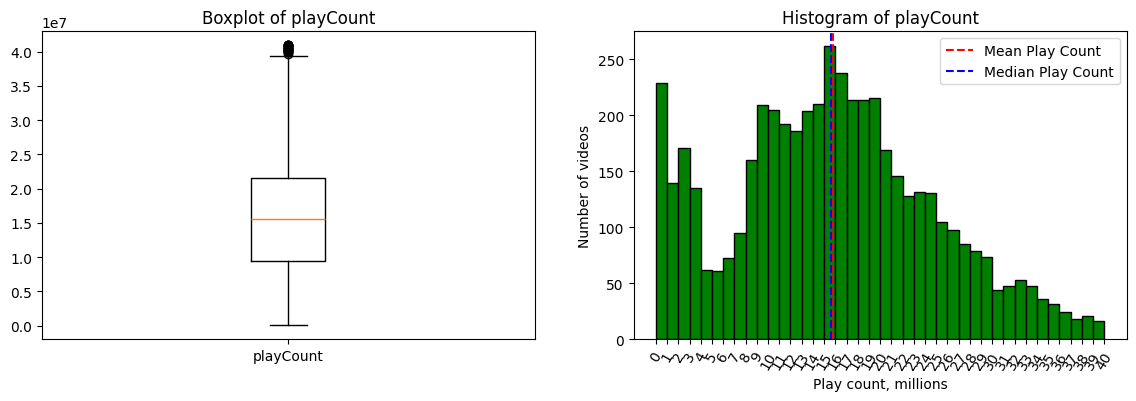

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['playCount'].values);
axs[0].set_title('Boxplot of playCount')
axs[0].set_xticklabels(['playCount']);

bins = [x for x in range(0, cleaned['playCount'].max(), 1000000)]
hst = axs[1].hist(cleaned['playCount'], color='green', ec='black', bins=bins);
axs[1].axvline(cleaned['playCount'].mean(), color='red', linestyle='--', label='Mean Play Count');
axs[1].axvline(cleaned['playCount'].median(), color='blue', linestyle='--', label='Median Play Count');
axs[1].set_title('Histogram of playCount')
axs[1].set_ylabel('Number of videos')
axs[1].set_xlabel('Play count, millions')
axs[1].set_xticks(bins);
axs[1].set_xticklabels([int(x / 1000000) for x in bins], rotation=60)
axs[1].legend();

That's much better

In [41]:
cleaned['playCount'].min(), cleaned['playCount'].max()

(44700, 40900000)

In [42]:
video_data = cleaned.copy()

Distribution of Categories

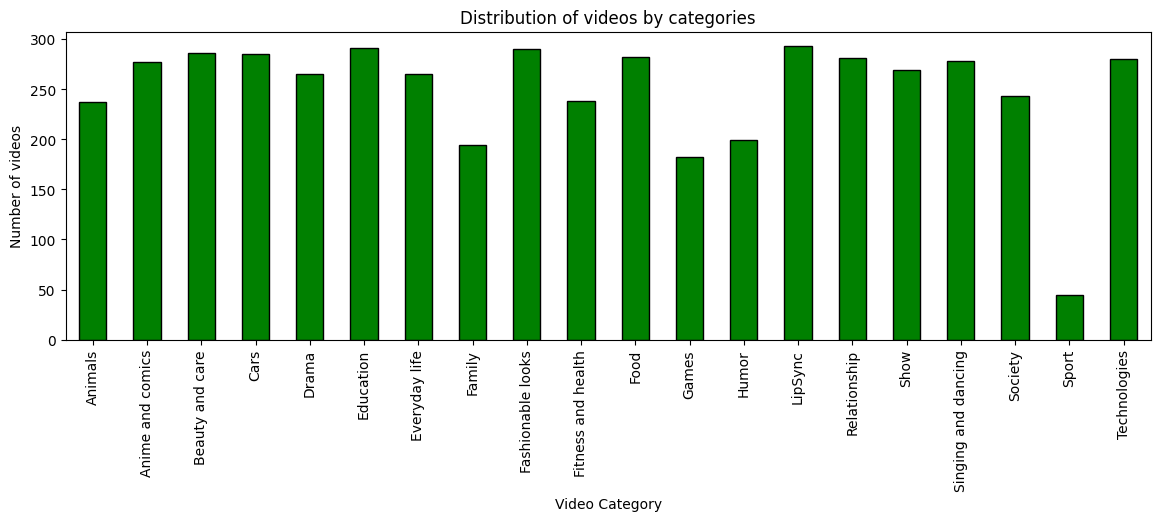

In [43]:
categories = video_data.pivot_table(index='video_theme', values='video_id', aggfunc='nunique')

fig, axs = plt.subplots(1, 1, figsize=(14, 4))
categories.plot(kind='bar', ax=axs, color='green', ec='black', legend=False);
axs.set_ylabel('Number of videos')
axs.set_xlabel('Video Category');
axs.set_title('Distribution of videos by categories');

The videos are almost evenly distributed across categories, but there is a category called Games, in which there are too few videos.

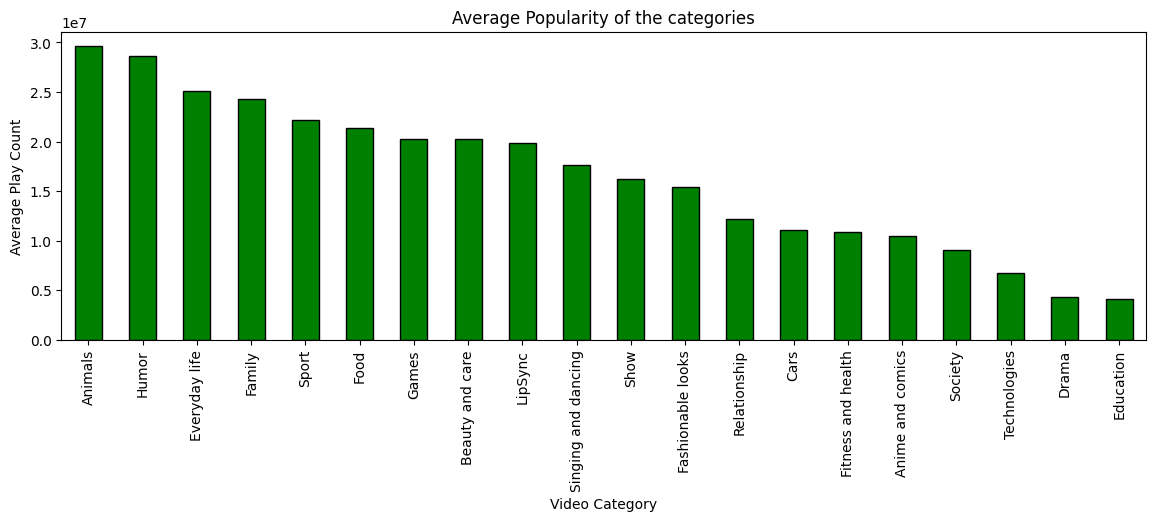

In [44]:
categories = video_data.pivot_table(index='video_theme', values='playCount', aggfunc='mean')

fig, axs = plt.subplots(1, 1, figsize=(14, 4))
categories.sort_values(by='playCount', ascending=False).plot(kind='bar', ax=axs, color='green', ec='black', legend=False);
axs.set_ylabel('Average Play Count')
axs.set_xlabel('Video Category');
axs.set_title('Average Popularity of the categories');

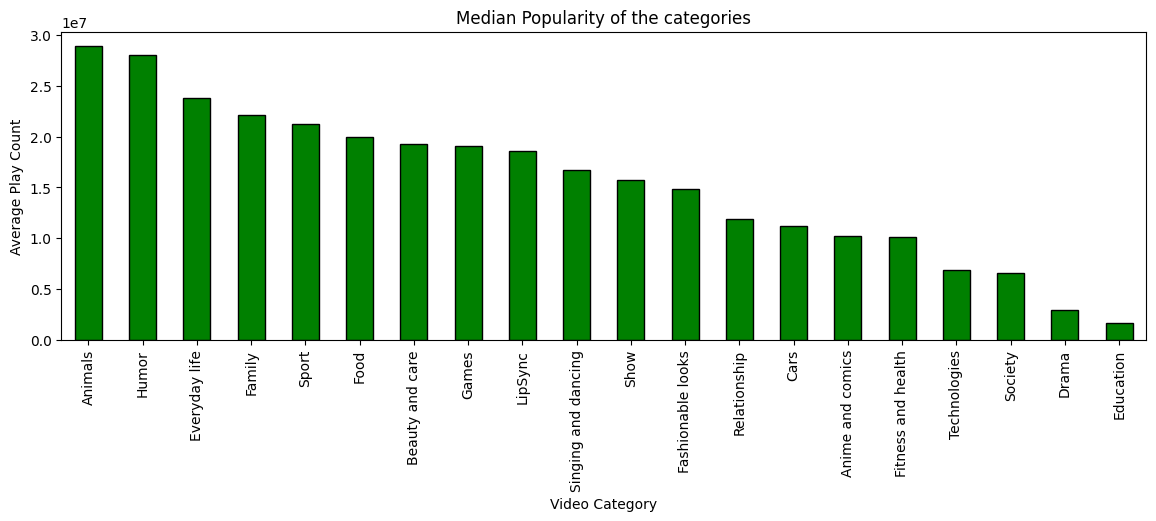

In [45]:
categories = video_data.pivot_table(index='video_theme', values='playCount', aggfunc='median')

fig, axs = plt.subplots(1, 1, figsize=(14, 4))
categories.sort_values(by='playCount', ascending=False).plot(kind='bar', ax=axs, color='green', ec='black', legend=False);
axs.set_ylabel('Average Play Count')
axs.set_xlabel('Video Category');
axs.set_title('Median Popularity of the categories');

`video_duration`

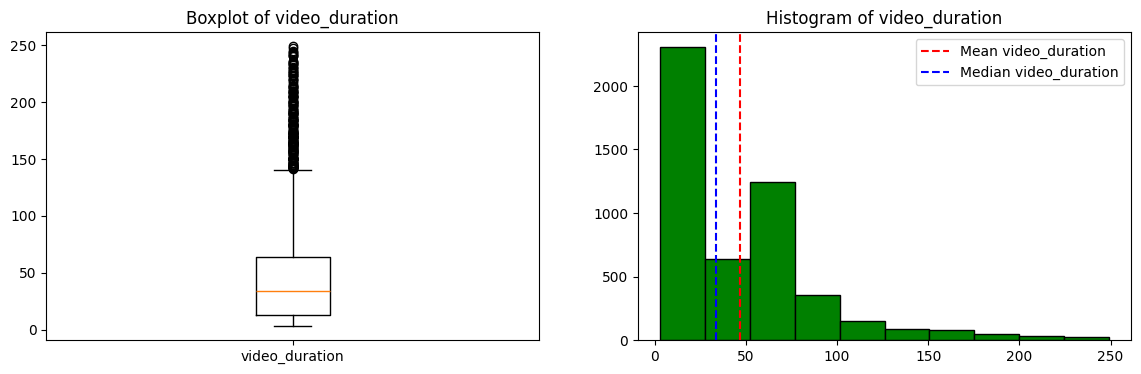

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['video_duration'].values);
axs[0].set_title('Boxplot of video_duration');
axs[0].set_xticklabels(['video_duration']);

axs[1].hist(video_data['video_duration'], color='green', ec='black');
axs[1].axvline(video_data['video_duration'].mean(), color='red', linestyle='--', label='Mean video_duration');
axs[1].axvline(video_data['video_duration'].median(), color='blue', linestyle='--', label='Median video_duration');
axs[1].set_title('Histogram of video_duration')
axs[1].legend();

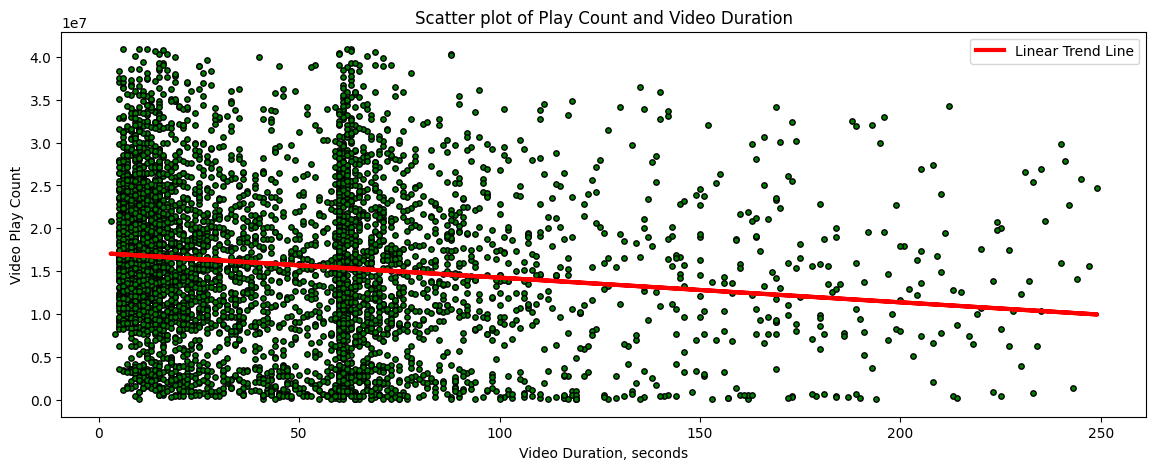

In [47]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['video_duration'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['video_duration'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['video_duration'], p(video_data['video_duration']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.ylabel('Video Play Count')
plt.xlabel('Video Duration, seconds');
plt.title('Scatter plot of Play Count and Video Duration');

In [48]:
video_data[video_data['video_duration'] > 180].shape[0] / video_data.shape[0]

0.019477911646586344

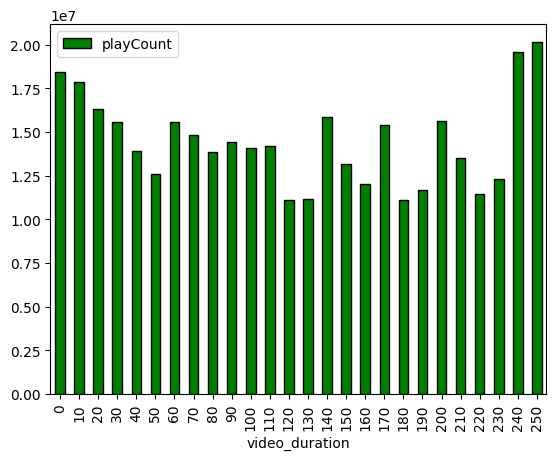

In [49]:
video_data.pivot_table(
    index=(np.round(video_data['video_duration'] / 10)*10).astype(int),
    values='playCount',
    aggfunc='mean'
).plot(kind='bar', color='green', ec='black');

`author_followerCount`

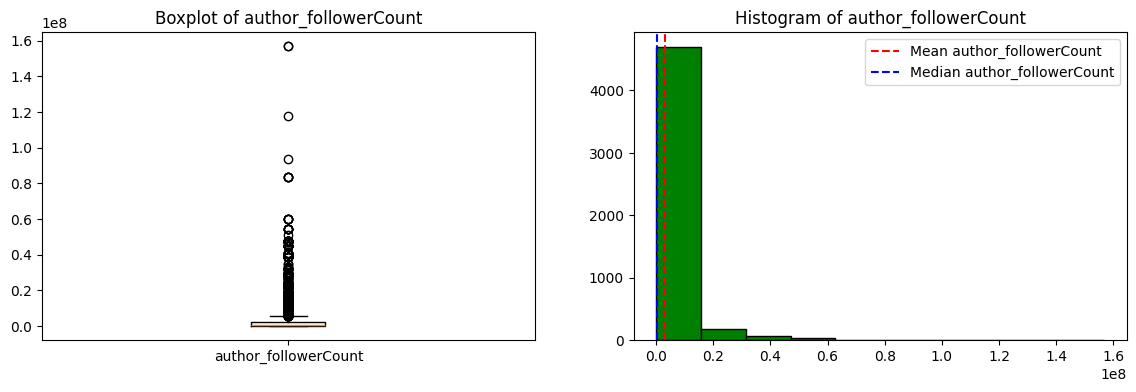

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['author_followerCount'].values);
axs[0].set_title('Boxplot of author_followerCount');
axs[0].set_xticklabels(['author_followerCount']);

axs[1].hist(video_data['author_followerCount'], color='green', ec='black');
axs[1].axvline(video_data['author_followerCount'].mean(), color='red', linestyle='--', label='Mean author_followerCount');
axs[1].axvline(video_data['author_followerCount'].median(), color='blue', linestyle='--', label='Median author_followerCount');
axs[1].set_title('Histogram of author_followerCount')
axs[1].legend();

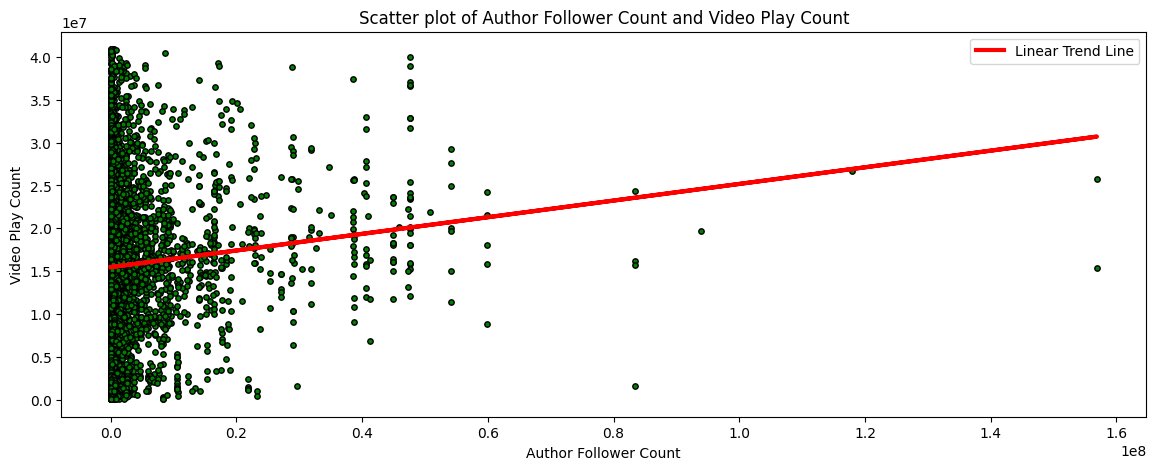

In [51]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['author_followerCount'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['author_followerCount'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['author_followerCount'], p(video_data['author_followerCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Follower Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Follower Count and Video Play Count');

In [52]:
video_data['author_followerCount'].min(), video_data['author_followerCount'].max()

(736, 156900000)

In [53]:
import scipy.stats as st

z_score = st.zscore(video_data['author_followerCount'])
cleaned = video_data.loc[z_score[(z_score < 1.96) & (z_score > -1.96)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

4980 4792


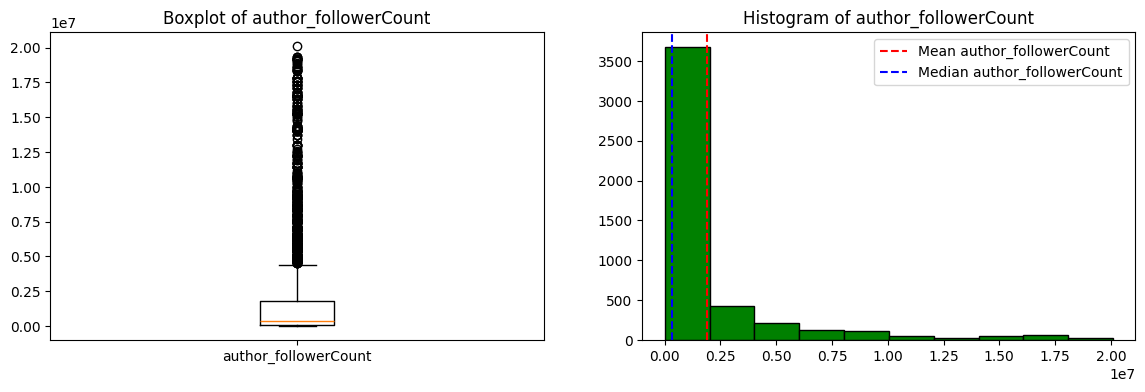

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['author_followerCount'].values);
axs[0].set_title('Boxplot of author_followerCount');
axs[0].set_xticklabels(['author_followerCount']);

axs[1].hist(cleaned['author_followerCount'], color='green', ec='black');
axs[1].axvline(cleaned['author_followerCount'].mean(), color='red', linestyle='--', label='Mean author_followerCount');
axs[1].axvline(cleaned['author_followerCount'].median(), color='blue', linestyle='--', label='Median author_followerCount');
axs[1].set_title('Histogram of author_followerCount')
axs[1].legend();

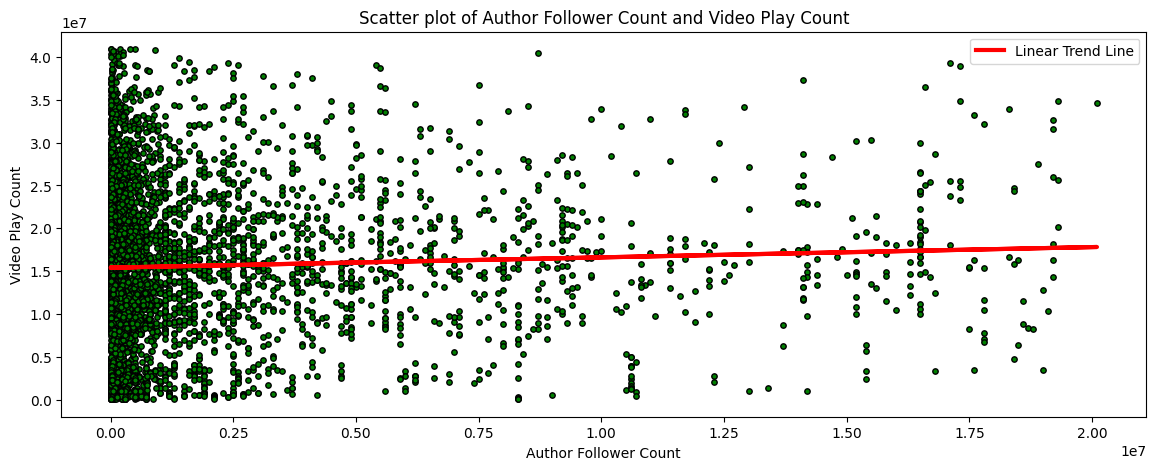

In [55]:
plt.figure(figsize=(14, 5))
plt.scatter(x=cleaned['author_followerCount'], y=cleaned['playCount'], color='green', ec='black', s=15);
z = np.polyfit(cleaned['author_followerCount'], cleaned['playCount'], 1)
p = np.poly1d(z)
plt.plot(cleaned['author_followerCount'], p(cleaned['author_followerCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Follower Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Follower Count and Video Play Count');

In [56]:
cleaned['author_followerCount'].min(), cleaned['author_followerCount'].max()

(736, 20100000)

In [57]:
video_data = cleaned.copy()

`author_followingCount`

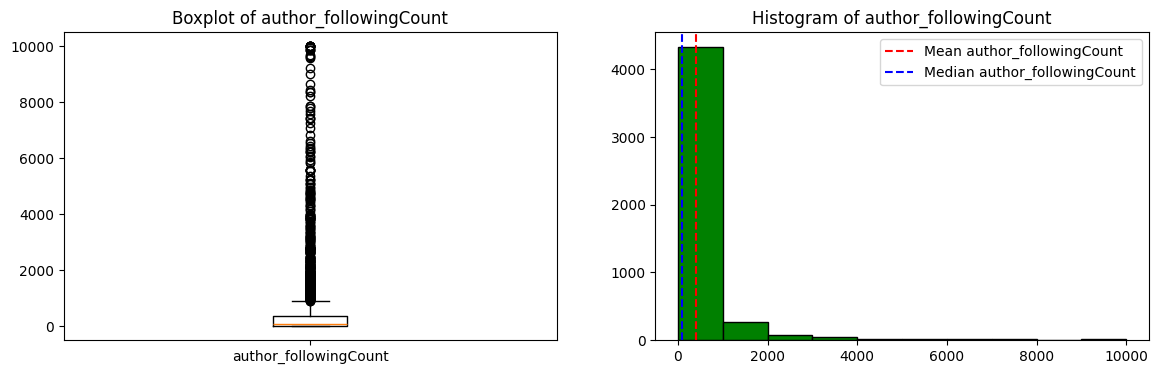

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['author_followingCount'].values);
axs[0].set_title('Boxplot of author_followingCount');
axs[0].set_xticklabels(['author_followingCount']);

axs[1].hist(video_data['author_followingCount'], color='green', ec='black');
axs[1].axvline(video_data['author_followingCount'].mean(), color='red', linestyle='--', label='Mean author_followingCount');
axs[1].axvline(video_data['author_followingCount'].median(), color='blue', linestyle='--', label='Median author_followingCount');
axs[1].set_title('Histogram of author_followingCount')
axs[1].legend();

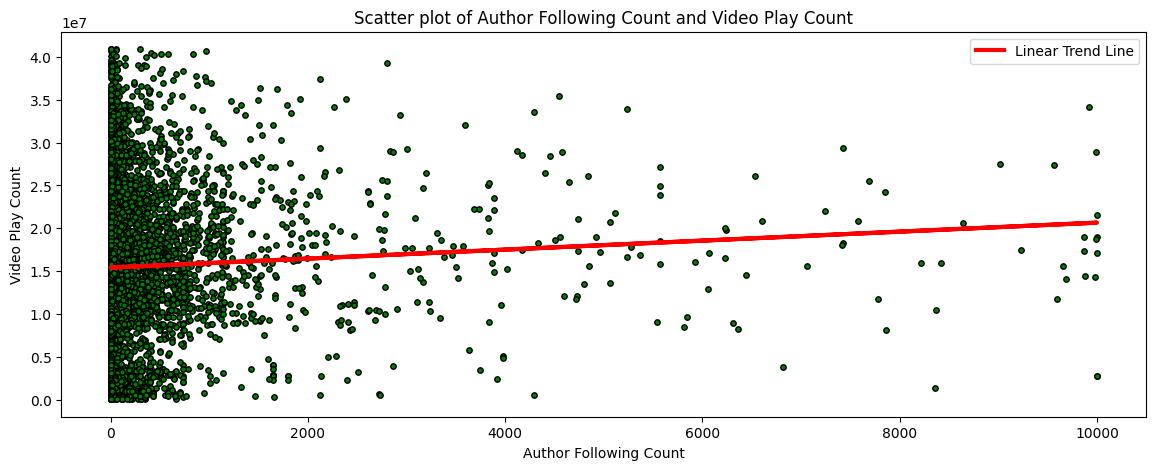

In [59]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['author_followingCount'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['author_followingCount'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['author_followingCount'], p(video_data['author_followingCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Following Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Following Count and Video Play Count');

In [60]:
import scipy.stats as st

z_score = st.zscore(video_data['author_followingCount'])
cleaned = video_data.loc[z_score[(z_score < 1.96) & (z_score > -1.96)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

4792 4633


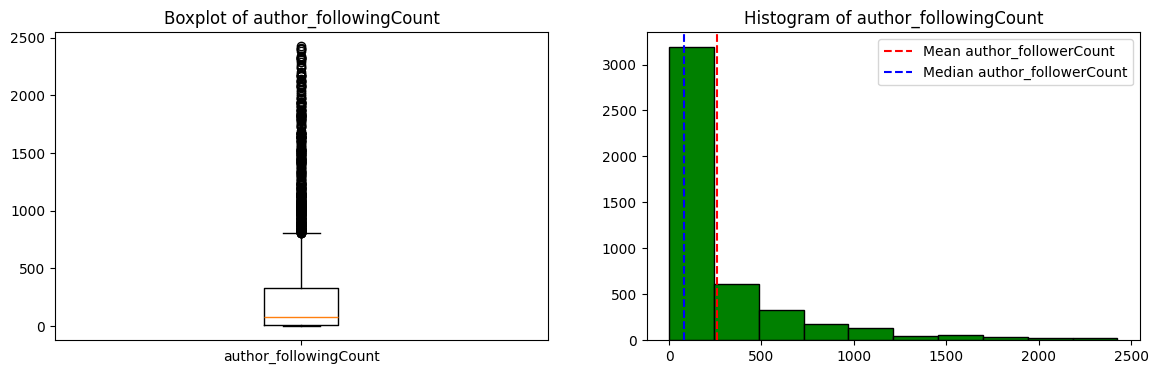

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['author_followingCount'].values);
axs[0].set_title('Boxplot of author_followingCount');
axs[0].set_xticklabels(['author_followingCount']);

axs[1].hist(cleaned['author_followingCount'], color='green', ec='black');
axs[1].axvline(cleaned['author_followingCount'].mean(), color='red', linestyle='--', label='Mean author_followerCount');
axs[1].axvline(cleaned['author_followingCount'].median(), color='blue', linestyle='--', label='Median author_followerCount');
axs[1].set_title('Histogram of author_followingCount')
axs[1].legend();

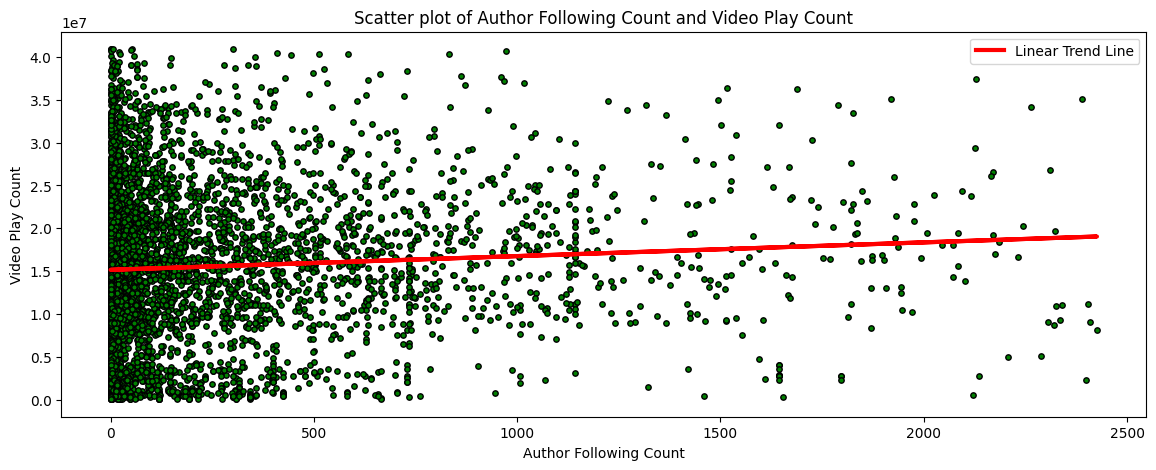

In [62]:
plt.figure(figsize=(14, 5))
plt.scatter(x=cleaned['author_followingCount'], y=cleaned['playCount'], color='green', ec='black', s=15);
z = np.polyfit(cleaned['author_followingCount'], cleaned['playCount'], 1)
p = np.poly1d(z)
plt.plot(cleaned['author_followingCount'], p(cleaned['author_followingCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Following Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Following Count and Video Play Count');

`author_videoCount`

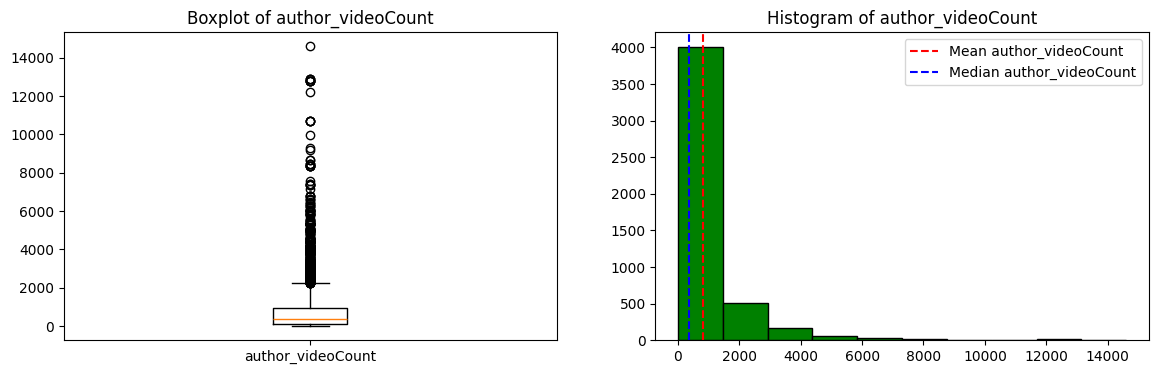

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['author_videoCount'].values);
axs[0].set_title('Boxplot of author_videoCount');
axs[0].set_xticklabels(['author_videoCount']);

axs[1].hist(video_data['author_videoCount'], color='green', ec='black');
axs[1].axvline(video_data['author_videoCount'].mean(), color='red', linestyle='--', label='Mean author_videoCount');
axs[1].axvline(video_data['author_videoCount'].median(), color='blue', linestyle='--', label='Median author_videoCount');
axs[1].set_title('Histogram of author_videoCount')
axs[1].legend();

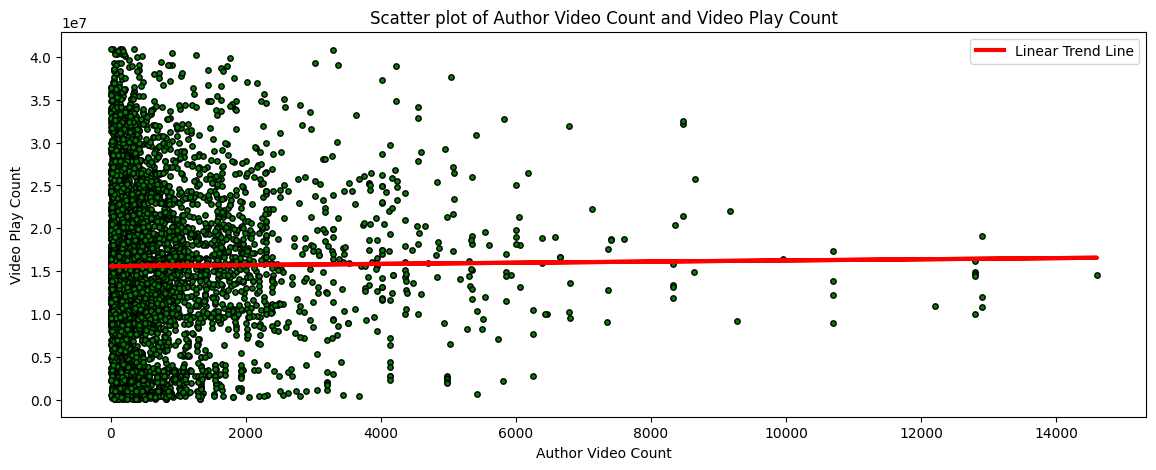

In [64]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['author_videoCount'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['author_videoCount'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['author_videoCount'], p(video_data['author_videoCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Video Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Video Count and Video Play Count');

In [65]:
import scipy.stats as st

z_score = st.zscore(video_data['author_videoCount'])
cleaned = video_data.loc[z_score[(z_score < 1.96) & (z_score > -1.96)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

4792 4573


In [66]:
cleaned['author_videoCount'].min(), cleaned['author_videoCount'].max()

(1, 3373)

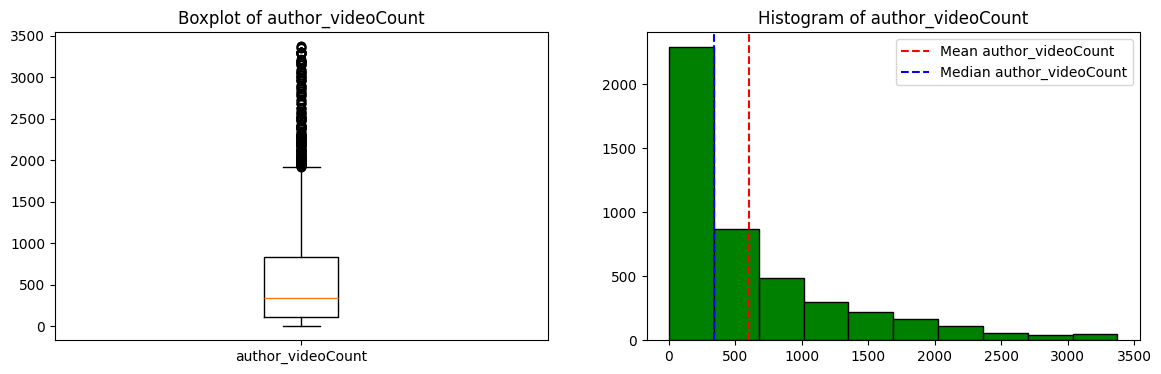

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['author_videoCount'].values);
axs[0].set_title('Boxplot of author_videoCount');
axs[0].set_xticklabels(['author_videoCount']);

axs[1].hist(cleaned['author_videoCount'], color='green', ec='black');
axs[1].axvline(cleaned['author_videoCount'].mean(), color='red', linestyle='--', label='Mean author_videoCount');
axs[1].axvline(cleaned['author_videoCount'].median(), color='blue', linestyle='--', label='Median author_videoCount');
axs[1].set_title('Histogram of author_videoCount')
axs[1].legend();

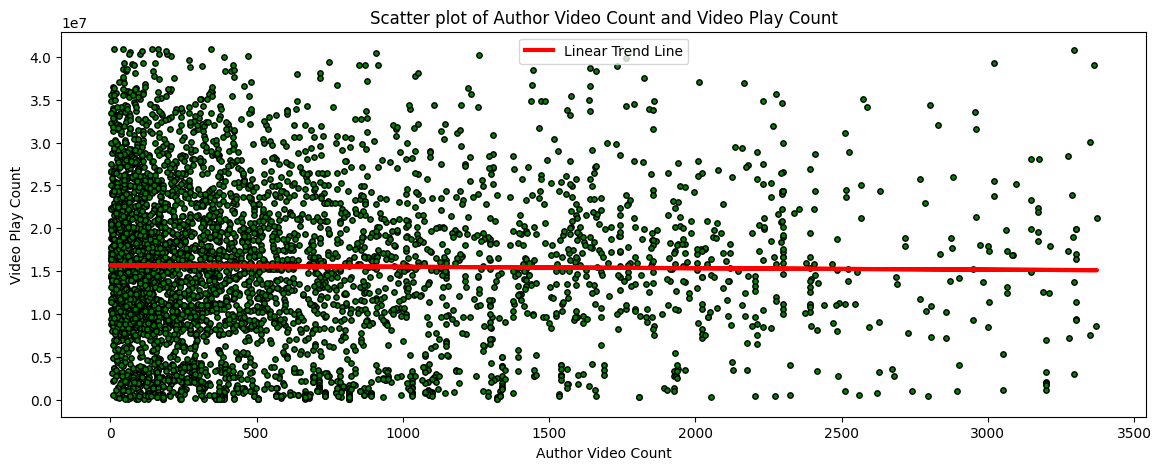

In [68]:
plt.figure(figsize=(14, 5))
plt.scatter(x=cleaned['author_videoCount'], y=cleaned['playCount'], color='green', ec='black', s=15);
z = np.polyfit(cleaned['author_videoCount'], cleaned['playCount'], 1)
p = np.poly1d(z)
plt.plot(cleaned['author_videoCount'], p(cleaned['author_videoCount']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Author Video Count')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Author Video Count and Video Play Count');

In [69]:
video_data = cleaned.copy()

`video_volumeInfo_Loudness`

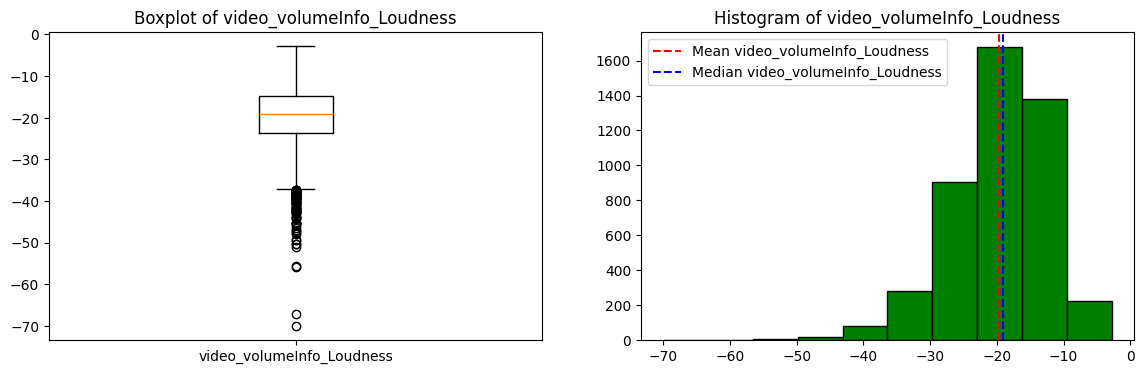

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['video_volumeInfo_Loudness'].values);
axs[0].set_title('Boxplot of video_volumeInfo_Loudness');
axs[0].set_xticklabels(['video_volumeInfo_Loudness']);

axs[1].hist(video_data['video_volumeInfo_Loudness'], color='green', ec='black');
axs[1].axvline(video_data['video_volumeInfo_Loudness'].mean(), color='red', linestyle='--', label='Mean video_volumeInfo_Loudness');
axs[1].axvline(video_data['video_volumeInfo_Loudness'].median(), color='blue', linestyle='--', label='Median video_volumeInfo_Loudness');
axs[1].set_title('Histogram of video_volumeInfo_Loudness')
axs[1].legend();

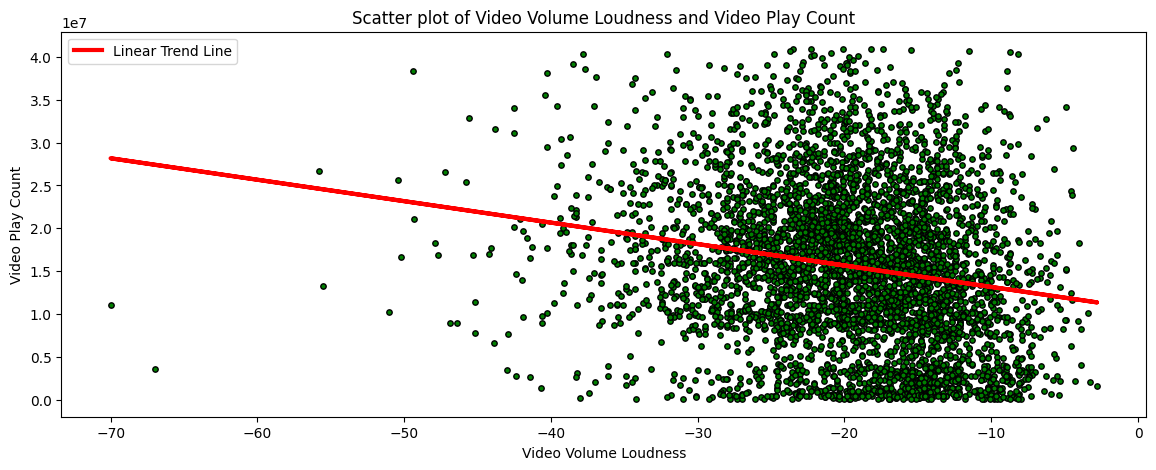

In [71]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['video_volumeInfo_Loudness'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['video_volumeInfo_Loudness'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['video_volumeInfo_Loudness'], p(video_data['video_volumeInfo_Loudness']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Video Volume Loudness')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Video Volume Loudness and Video Play Count');

In [72]:
import scipy.stats as st

z_score = st.zscore(video_data['video_volumeInfo_Loudness'])
cleaned = video_data.loc[z_score[(z_score < 2.4) & (z_score > -2.4)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

4573 4477


In [73]:
cleaned['video_volumeInfo_Loudness'].min(), cleaned['video_volumeInfo_Loudness'].max()

(-36.6, -2.8)

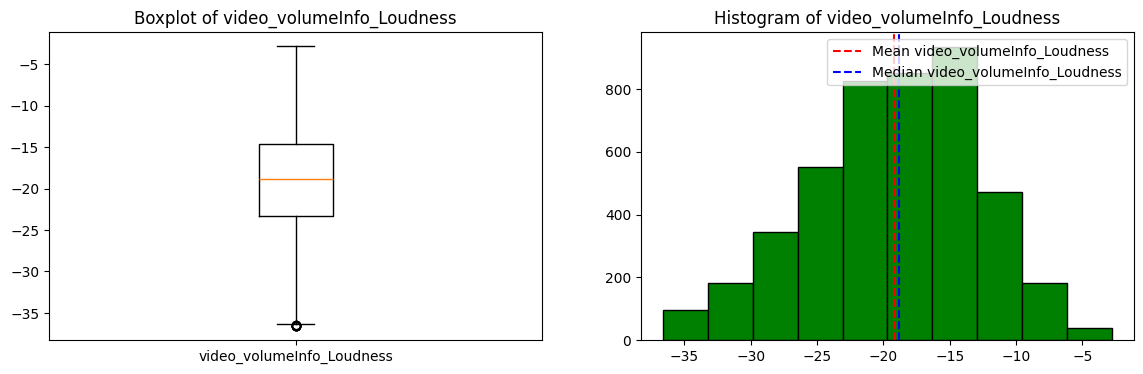

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['video_volumeInfo_Loudness'].values);
axs[0].set_title('Boxplot of video_volumeInfo_Loudness');
axs[0].set_xticklabels(['video_volumeInfo_Loudness']);

axs[1].hist(cleaned['video_volumeInfo_Loudness'], color='green', ec='black');
axs[1].axvline(cleaned['video_volumeInfo_Loudness'].mean(), color='red', linestyle='--', label='Mean video_volumeInfo_Loudness');
axs[1].axvline(cleaned['video_volumeInfo_Loudness'].median(), color='blue', linestyle='--', label='Median video_volumeInfo_Loudness');
axs[1].set_title('Histogram of video_volumeInfo_Loudness')
axs[1].legend();

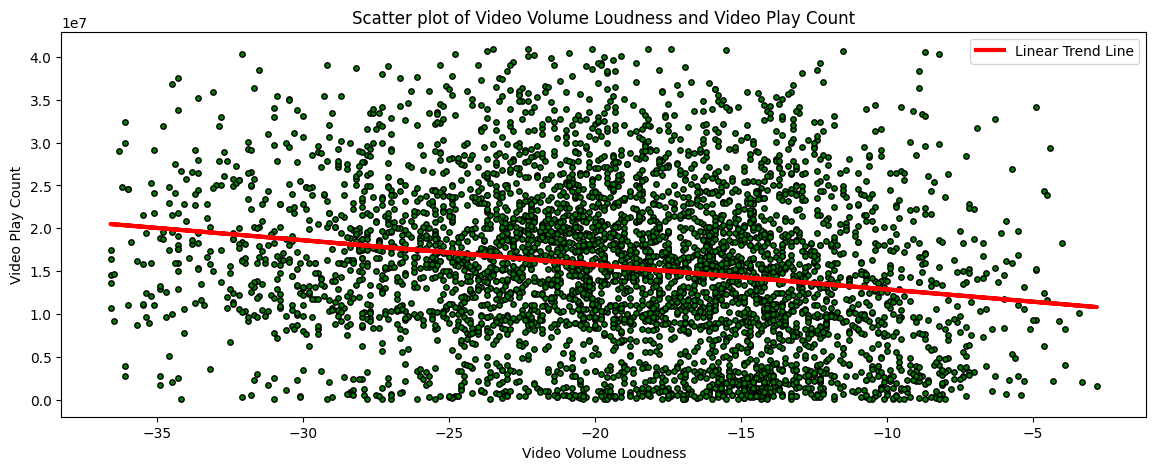

In [75]:
plt.figure(figsize=(14, 5))
plt.scatter(x=cleaned['video_volumeInfo_Loudness'], y=cleaned['playCount'], color='green', ec='black', s=15);
z = np.polyfit(cleaned['video_volumeInfo_Loudness'], cleaned['playCount'], 1)
p = np.poly1d(z)
plt.plot(cleaned['video_volumeInfo_Loudness'], p(cleaned['video_volumeInfo_Loudness']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Video Volume Loudness')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Video Volume Loudness and Video Play Count');

In [76]:
video_data = cleaned.copy()

`video_volumeInfo_Peak`

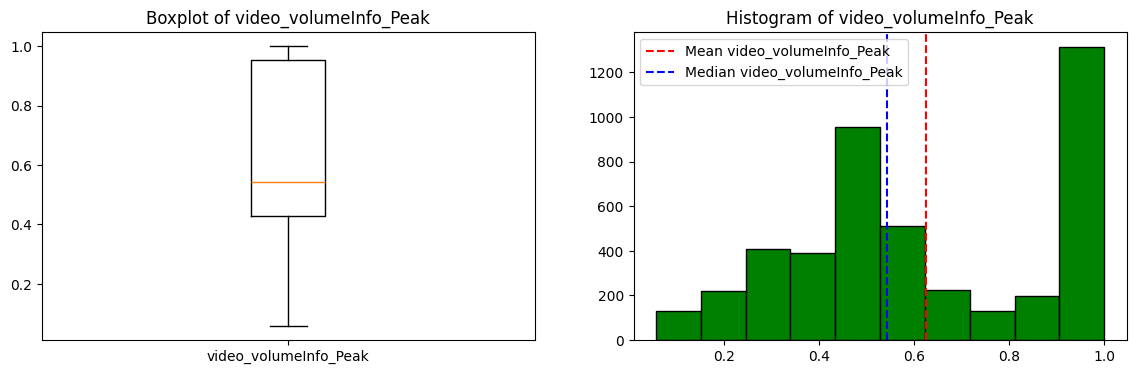

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['video_volumeInfo_Peak'].values);
axs[0].set_title('Boxplot of video_volumeInfo_Peak');
axs[0].set_xticklabels(['video_volumeInfo_Peak']);

axs[1].hist(video_data['video_volumeInfo_Peak'], color='green', ec='black');
axs[1].axvline(video_data['video_volumeInfo_Peak'].mean(), color='red', linestyle='--', label='Mean video_volumeInfo_Peak');
axs[1].axvline(video_data['video_volumeInfo_Peak'].median(), color='blue', linestyle='--', label='Median video_volumeInfo_Peak');
axs[1].set_title('Histogram of video_volumeInfo_Peak')
axs[1].legend();

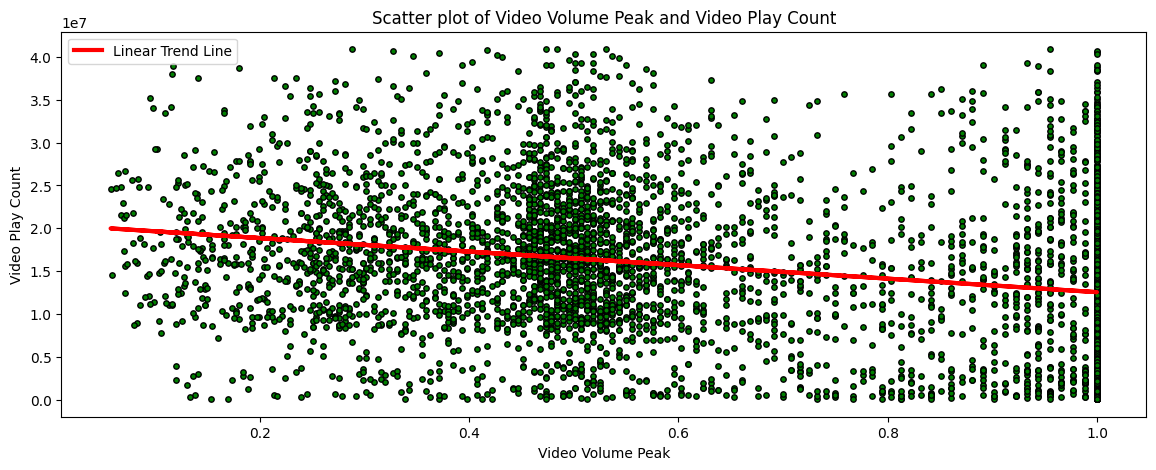

In [78]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['video_volumeInfo_Peak'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['video_volumeInfo_Peak'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['video_volumeInfo_Peak'], p(video_data['video_volumeInfo_Peak']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Video Volume Peak')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Video Volume Peak and Video Play Count');

`music_isCopyrighted`

In [79]:
video_data.pivot_table(index='music_isCopyrighted', values='playCount', aggfunc='mean')

,playCount
music_isCopyrighted,
0.0,1.498489e+07
1.0,1.740023e+07


In [80]:
video_data.pivot_table(index='music_original', values='playCount', aggfunc='mean')

,playCount
music_original,
0.0,1.599161e+07
1.0,1.537376e+07


In [81]:
video_data.pivot_table(index='face', values='playCount', aggfunc='mean')

,playCount
face,
0.0,1.585227e+07
1.0,1.539444e+07


In [82]:
video_data.pivot_table(index='text_on_picutre', values='playCount', aggfunc='mean')

,playCount
text_on_picutre,
0.0,1.625603e+07
1.0,1.514647e+07


In [83]:
video_data.pivot_table(index='text_on_picutre', values='playCount', aggfunc='median')

,playCount
text_on_picutre,
0.0,15950000.0
1.0,14800000.0


`avg_motion`

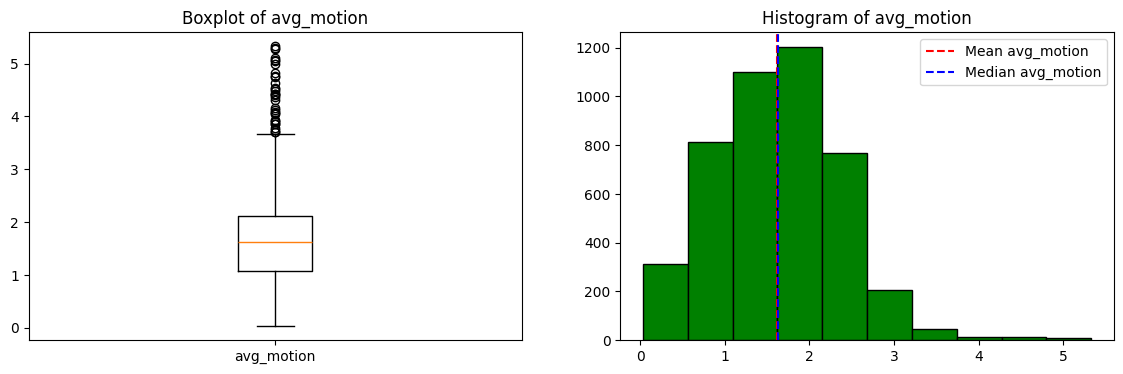

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(video_data['avg_motion'].values);
axs[0].set_title('Boxplot of avg_motion');
axs[0].set_xticklabels(['avg_motion']);

axs[1].hist(video_data['avg_motion'], color='green', ec='black');
axs[1].axvline(video_data['avg_motion'].mean(), color='red', linestyle='--', label='Mean avg_motion');
axs[1].axvline(video_data['avg_motion'].median(), color='blue', linestyle='--', label='Median avg_motion');
axs[1].set_title('Histogram of avg_motion')
axs[1].legend();

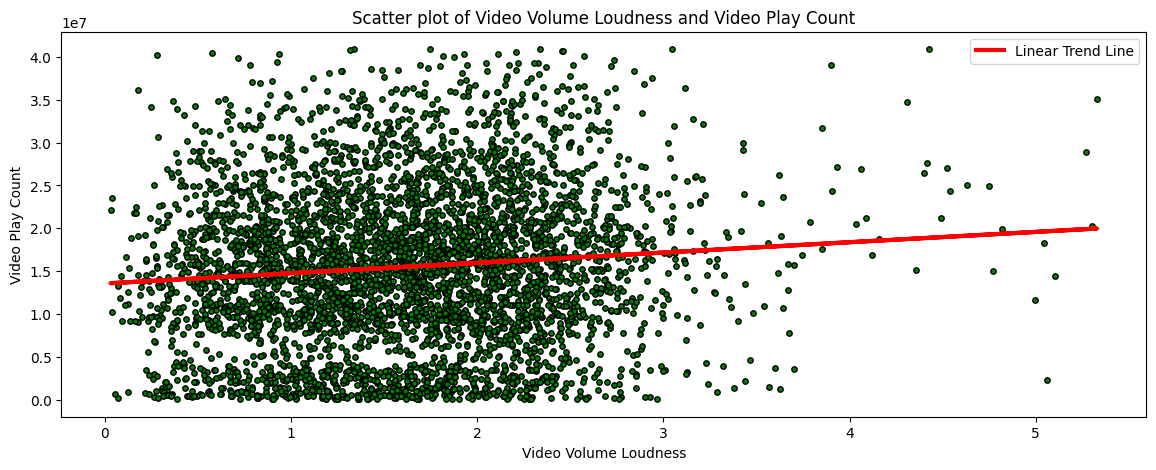

In [85]:
plt.figure(figsize=(14, 5))
plt.scatter(x=video_data['avg_motion'], y=video_data['playCount'], color='green', ec='black', s=15);
z = np.polyfit(video_data['avg_motion'], video_data['playCount'], 1)
p = np.poly1d(z)
plt.plot(video_data['avg_motion'], p(video_data['avg_motion']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Video Volume Loudness')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Video Volume Loudness and Video Play Count');

In [86]:
import scipy.stats as st

z_score = st.zscore(video_data['avg_motion'])
cleaned = video_data.loc[z_score[(z_score < 2.4) & (z_score > -2.4)].index].copy()

print(video_data.shape[0], cleaned.shape[0])

4477 4420


In [87]:
cleaned['avg_motion'].min(), cleaned['avg_motion'].max()

(0.030140697956085205, 3.3640570640563965)

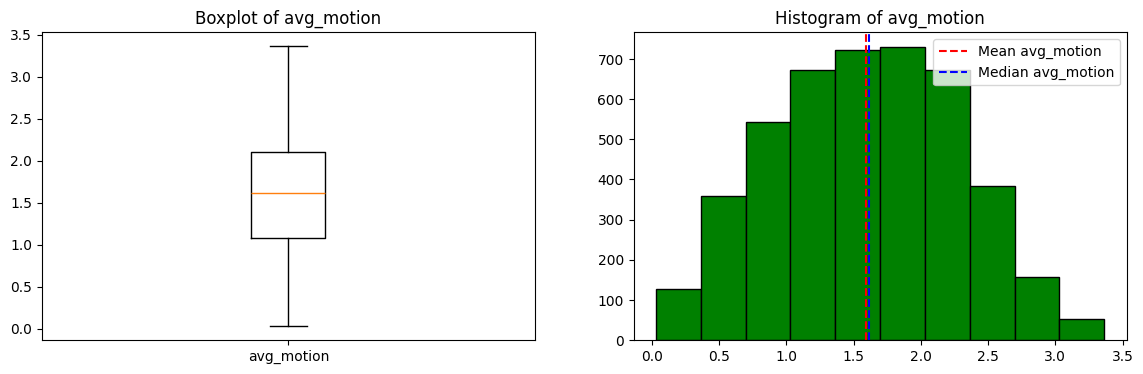

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].boxplot(cleaned['avg_motion'].values);
axs[0].set_title('Boxplot of avg_motion');
axs[0].set_xticklabels(['avg_motion']);

axs[1].hist(cleaned['avg_motion'], color='green', ec='black');
axs[1].axvline(cleaned['avg_motion'].mean(), color='red', linestyle='--', label='Mean avg_motion');
axs[1].axvline(cleaned['avg_motion'].median(), color='blue', linestyle='--', label='Median avg_motion');
axs[1].set_title('Histogram of avg_motion')
axs[1].legend();

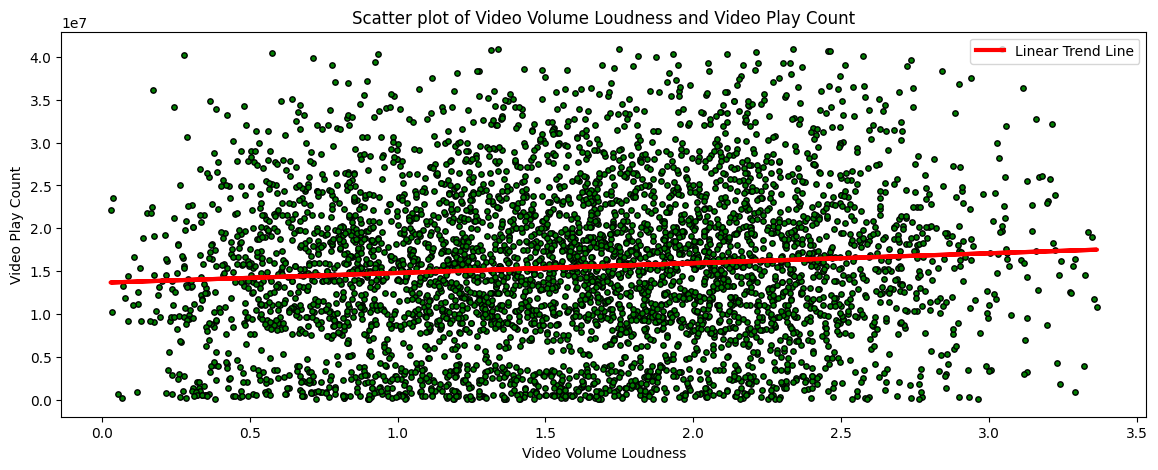

In [89]:
plt.figure(figsize=(14, 5))
plt.scatter(x=cleaned['avg_motion'], y=cleaned['playCount'], color='green', ec='black', s=15);
z = np.polyfit(cleaned['avg_motion'], cleaned['playCount'], 1)
p = np.poly1d(z)
plt.plot(cleaned['avg_motion'], p(cleaned['avg_motion']), color='red', label='Linear Trend Line', lw=3);
plt.legend()
plt.xlabel('Video Volume Loudness')
plt.ylabel('Video Play Count');
plt.title('Scatter plot of Video Volume Loudness and Video Play Count');

In [90]:
video_data.pivot_table(index='author_verified', values='playCount', aggfunc='median')

,playCount
author_verified,
0,15200000.0
1,15500000.0


In [91]:
video_data.pivot_table(index='music_non_music', values='playCount', aggfunc='mean')

,playCount
music_non_music,
Music,1.585766e+07
Non Music,1.501571e+07


In [92]:
pd.to_datetime(video_data['createTime'], unit='s')

0      2025-03-31 18:10:31
1      2025-03-01 03:46:38
2      2025-03-08 15:25:43
3      2025-02-24 11:40:58
4      2025-02-27 02:10:55
               ...        
5079   2025-04-01 01:03:16
5080   2025-05-22 22:33:41
5081   2025-03-24 08:16:18
5082   2025-04-22 15:46:11
5083   2025-03-29 07:42:43
Name: createTime, Length: 4477, dtype: datetime64[ns]

In [93]:
video_data['createTime'] = pd.to_datetime(video_data['createTime'], unit='s')
video_data['createDate'] = pd.to_datetime(video_data['createTime'].dt.date)

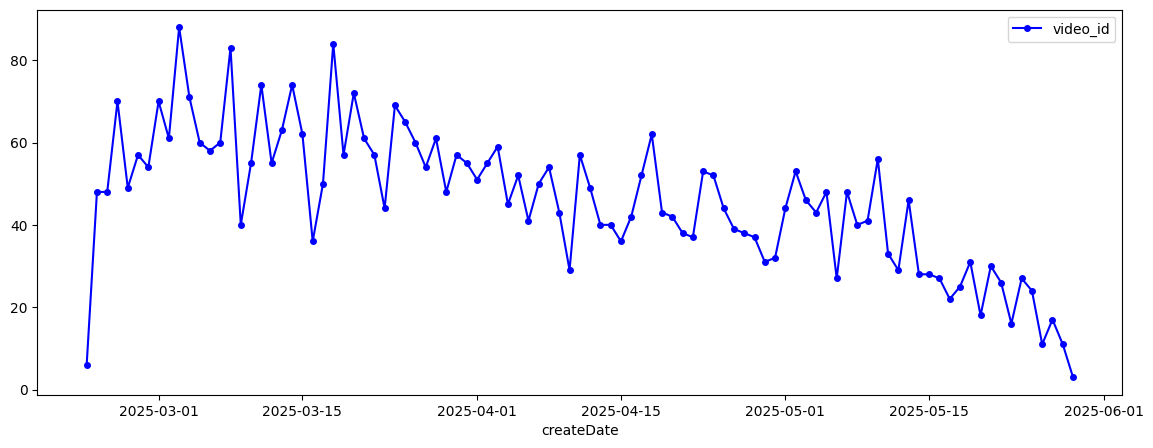

In [94]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
video_data.pivot_table(index=video_data['createDate'].dt.date, values='video_id', aggfunc='count').plot(kind='line', color='blue', marker='o', markersize=4, ax=axs);

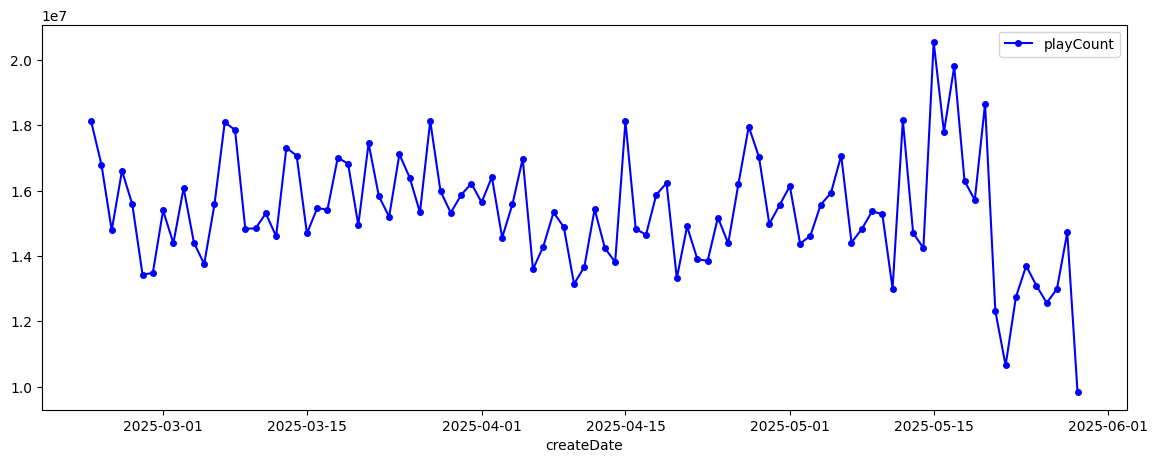

In [95]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
video_data.pivot_table(index=video_data['createDate'].dt.date, values='playCount', aggfunc='mean').plot(kind='line', color='blue', marker='o', markersize=4, ax=axs);

In [96]:
video_data.select_dtypes(exclude=['object', 'datetime'])

,playCount,commentCount,collectCount,shareCount,diggCount,author_verified,author_commentSetting,author_downloadSetting,author_duetSetting,author_followerCount,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,quality_score,snr,harmonicity,dyn_range,centroid,clipping
0,29300000,16700,293000,447700,5200000,0,0,0,0,17800,...,8.490293,3.697615,3.803981,-2.257645,216.332812,23.662889,0.660976,0.181433,2090.654613,0.000009
1,22100000,15800,123000,41800,1600000,0,0,0,0,7700000,...,6.982800,0.151920,3.135674,-2.185694,217.014563,29.243212,0.359520,1.553173,2078.590591,0.000009
2,21300000,30900,36800,96100,974100,0,0,0,0,1500000,...,8.729190,-7.059931,7.135955,-6.520561,235.838599,35.738437,0.192419,0.635752,2249.514318,0.000009
3,32200000,6159,35300,11500,1200000,1,0,0,0,17800000,...,6.124158,-2.278548,5.104350,-5.609164,280.115252,20.674551,0.434813,0.610063,2737.039103,0.000009
4,22100000,10200,347800,136900,3400000,0,0,0,0,460700,...,-3.525663,-14.363482,-2.073953,-3.108175,87.684659,38.964691,0.877907,1.063153,756.070383,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,1300000,2924,32800,125600,385900,1,0,0,0,93000,...,15.575876,-0.012913,6.560015,-1.526069,176.782907,30.288141,0.460121,0.749238,1674.545908,0.000009
5080,1000000,421,17800,3301,76800,0,0,0,0,13000000,...,-0.218344,1.421002,1.718848,-0.970409,164.399991,36.800025,0.736431,0.684932,1530.757054,0.000027
5081,1000000,20,988,407,3742,0,0,0,0,57400,...,6.364104,-3.099412,1.027016,-1.654151,173.179085,28.908262,0.425700,1.276456,1641.661710,0.000018
5082,1700000,231,2721,549,33200,1,0,0,0,749100,...,-1.534135,-14.227228,-3.422370,-7.576814,188.842881,36.447396,0.507236,0.518450,1777.035228,0.000009


## Text Features

### Hashtags

In [535]:
top_hs = ['fyp', 'viral', 'foryou', 'foryoupage', 'fypシ', 'funny', 'trending',
       'tiktok', 'asmr', 'viralvideo', 'fypシ゚viral', 'cute', 'parati', 'usa',
       'cat', 'funnyvideos', 'love', 'relatable', 'fy',
       'fyppppppppppppppppppppppp', 'catsoftiktok', 'prank', 'dogsoftiktok',
       'fypage', 'baby', 'animation', 'trend', 'dog', 'couple', 'satisfying',
       'reflexion', 'challenge', 'gym', 'creatorsearchinsights', 'ai', 'car',
       'prom', 'drama', 'history', 'nyc', 'explore',
       'paratiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii', 'mukbang', 'cars',
       'unitedstates', 'usa🇺🇸', 'pet', 'edit', 'singing', 'viraltiktok']
top_hs = ['#'+x for x in top_hs]

In [97]:
top_hashtags = video_data['video_hashtags'].str.lower().str.split().explode().value_counts().head(50).index

In [98]:
video_hashtags = video_data[['video_id', 'video_hashtags']].copy()

In [99]:
def check_hashtag(hashtags_str, hashtag):
    if pd.isna(hashtags_str):
        return 0
    return 1 if hashtag in hashtags_str.split() else 0

# Создаём DataFrame с бинарными столбцами
for hashtag in top_hashtags:
    video_hashtags['hashtag_{}'.format(hashtag)] = video_hashtags["video_hashtags"].apply(lambda x: check_hashtag(x, hashtag))

# Удаляем исходный столбец (если не нужен)
video_hashtags = video_hashtags.drop("video_hashtags", axis=1)

In [100]:
video_hashtags

,video_id,hashtag_fyp,hashtag_viral,hashtag_foryou,hashtag_foryoupage,hashtag_fypシ,hashtag_funny,hashtag_trending,hashtag_tiktok,hashtag_asmr,...,hashtag_explore,hashtag_paratiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii,hashtag_mukbang,hashtag_cars,hashtag_unitedstates,hashtag_usa🇺🇸,hashtag_pet,hashtag_edit,hashtag_singing,hashtag_viraltiktok
0,7488037420731059499,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7476682375007685931,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7479460137074347310,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7474948817524149546,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7475915526070439214,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,7488143895705144622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5080,7507401898375318790,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5081,7485286417833151786,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5082,7496164203254828318,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
video_data = video_data.merge(video_hashtags, on=['video_id'], how='left')

In [134]:
video_data['music_musicAuthorName'].value_counts().head(30)

music_musicAuthorName
Doechii                             29
Daniel’s inside                     18
Franklin Saint                      17
CRISTIAN HD                         17
Gold-Tiger                          14
Kevin MacLeod & Kevin The Monkey    14
MXZI                                13
twoFriendsTV                        12
GloRilla                            12
Draganov89                          11
kakumaru                            11
yanethguzmanmarquez                 11
Connie Francis                      11
El Chamarra                         11
Law By Mike                         11
Fuerza Regida & Grupo Frontera      11
Alex Warren                         11
Aphex Twin                          10
.                                   10
Orange cats                         10
S and N                              9
Cleo Abram                           9
Myth World 👑                         9
Chris Stocks                         8
officialmooli                        8
~Ai

In [143]:
video_data_tst = video_data.copy()

In [ ]:
video_data_tst

In [144]:
import re

video_data_tst['video_desc_cleaned'] = video_data_tst['video_desc2'].apply(lambda x: re.sub(r'#\w+', '', x) if isinstance(x, str) else x)

In [148]:
video_data_tst['desc_length'] = video_data_tst['video_desc_cleaned'].str.len()

In [150]:
video_data_tst['has_question_mark'] = video_data_tst['video_desc_cleaned'].str.contains(r'\?', regex=True).astype(int)

In [151]:
video_data_tst['has_mention'] = video_data_tst['video_desc_cleaned'].str.contains(r'\@', regex=True).astype(int)

In [138]:
video_data.select_dtypes(include=['object']).drop(['author_id', 'author_uniqueid', 'video_theme', 'parsingTime', 'video_url', 'video_urlDownload', 'video_hashtags', 'definition', 'ratio', 'textLanguage'], axis=1)

,video_id,author_nickname,author_signature,video_desc2,video_text_content,VQScore,video_quality,music_authorName,music_id,music_album,music_musicAuthorName,music_title,music_meta_song_id,music_song_id,suggest_words,stickers,stickers_types,music_non_music
0,7488037420731059499,Sammy,venmo: Samantha-Kuruc,I BELIEVE #viral #foryoupage #springarc #shrek...,I BELIEVE #viral #foryoupage #springarc #shre...,62.62,normal,Abrilly,7480279471770176287,None,Abrilly,original sound,,,,,,Music
1,7476682375007685931,Cale Brown,BOMBER JACKETS👇🏼,"Beanies are almost sold out, link in bio mamas","Beanies are almost sold out, link in bio mamas",58.26,normal,50 Cent,6904111848841283585,The Massacre,50 Cent,Candy Shop,6733116688348219393,48504172,,,,Music
2,7479460137074347310,LosNegrete,"📍LA, CA (SFV)\n\nP.O. Box 481 San Fernando, CA...",Asi es como sacamos las canciones detrás de cá...,Asi es como sacamos las canciones detrás de c...,69.56,normal,LosNegrete,7479460185396890414,None,LosNegrete,original sound,,,,,,Music
3,7474948817524149546,Natti Natasha,#EnAmargue mi nuevo álbum ❤️‍🩹 disponible aqui👇🏼,Que nunca falte el momento de sacar a tu parej...,Que nunca falte el momento de sacar a tu pare...,57.82,normal,NATTI NATASHA,7467243532837177361,Natti Natasha en Amargue,NATTI NATASHA,Desde Hoy,7449569005020530705,1786010934,,,,Music
4,7475915526070439214,reddek.mccaul,UT🏔️\n18\nInsta: 400k+\n👻- reddmccaul\n📩 - red...,stubborn love #cover #stubbornlove #singing #...,stubborn love #cover #stubbornlove #singing...,73.91,normal,reddek.mccaul,7475920759295085354,None,reddek.mccaul,original sound,,,stubborn love guitar tutorial+++,,,Non Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,7488143895705144622,Hyte,HYTE > All.,we were only here to buy toilet paper 😳 #costc...,we were only here to buy toilet paper 😳 #cost...,0,normal,Hyte,7488143964646968110,None,Hyte,original sound,7427821692125480976,1775029106,,,,Non Music
4473,7507401898375318790,nevaaadaa,info@nevadamgmt.com\nCheck out Infinity Nikki ...,wallpaper for besties with @PhotoGrid APP 🥹,wallpaper for besties with @PhotoGrid APP 🥹,0,normal,nevaaadaa,7507401909146372869,None,nevaaadaa,original sound,7429044813260277776,1770465315,,,,Music
4474,7485286417833151786,FUNCAT-Global,FUNCAT created by self-owned factory. \nFocusi...,¿Cuál es la razón por la que la gente empieza ...,¿Cuál es la razón por la que la gente empieza...,71.2,normal,SUSAKI BEATS,7416427563381442561,MILLION DOLLAR 4.0,SUSAKI BEATS,MILLION DOLLAR 4.0,7416426878259660816,1769714608,,,,Music
4475,7496164203254828318,MAGICJOHN.OFFICIAL,MagicJohn screen \nprotector Official Account!...,"It’s small, but with six adjustable wind speed...","It’s small, but with six adjustable wind spee...",68.89,normal,MAGICJOHN.OFFICIAL,7496164242400234271,None,MAGICJOHN.OFFICIAL,original sound,,,,,,Non Music


# Machine Learning

In [469]:
video_data_tst = video_data_tst.drop('diff', axis=1)

In [569]:
video_data_tst

,video_id,createTime,playCount,commentCount,collectCount,shareCount,diggCount,author_nickname,author_id,author_uniqueid,...,hashtag_unitedstates,hashtag_usa🇺🇸,hashtag_pet,hashtag_edit,hashtag_singing,hashtag_viraltiktok,video_desc_cleaned,desc_length,has_question_mark,has_mention
0,7488037420731059499,2025-03-31 18:10:31,29300000,16700,293000,447700,5200000,Sammy,6700308861284582405,samanthakuruc,...,0,0,0,0,0,0,I BELIEVE,16,0,0
1,7476682375007685931,2025-03-01 03:46:38,22100000,15800,123000,41800,1600000,Cale Brown,6807286701384680453,calebrownn,...,0,0,0,0,0,0,"Beanies are almost sold out, link in bio mamas",46,0,0
2,7479460137074347310,2025-03-08 15:25:43,21300000,30900,36800,96100,974100,LosNegrete,6776434903045587973,losnegretefam,...,0,0,0,0,0,0,Asi es como sacamos las canciones detrás de cá...,83,0,1
3,7474948817524149546,2025-02-24 11:40:58,32200000,6159,35300,11500,1200000,Natti Natasha,6519601846326137856,nattinatasha,...,0,0,0,0,0,0,Que nunca falte el momento de sacar a tu parej...,143,0,0
4,7475915526070439214,2025-02-27 02:10:55,22100000,10200,347800,136900,3400000,reddek.mccaul,7091788427524342826,reddek.mccaul,...,0,0,0,0,1,0,stubborn love,23,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,7488143895705144622,2025-04-01 01:03:16,1300000,2924,32800,125600,385900,Hyte,6936303135849726981,hytebrand,...,0,0,0,0,0,0,we were only here to buy toilet paper 😳,45,0,0
4473,7507401898375318790,2025-05-22 22:33:41,1000000,421,17800,3301,76800,nevaaadaa,6584048047255601158,nevaaadaa,...,0,0,0,0,0,0,wallpaper for besties with @PhotoGrid APP 🥹,43,0,1
4474,7485286417833151786,2025-03-24 08:16:18,1000000,20,988,407,3742,FUNCAT-Global,7310141169371808814,funcat_global,...,0,0,0,0,0,0,¿Cuál es la razón por la que la gente empieza ...,74,1,0
4475,7496164203254828318,2025-04-22 15:46:11,1700000,231,2721,549,33200,MAGICJOHN.OFFICIAL,7310483997769860142,magicjohn.official,...,0,0,0,0,0,0,"It’s small, but with six adjustable wind speed...",112,0,0


In [591]:
# video_data_tst.to_sql('videos_metadata_to_analyze', connection, if_exists='append', index=False)

In [470]:
video_data_copy = pd.get_dummies(video_data_tst, columns=['video_theme', 'music_non_music']).copy()
video_data_copy = video_data_copy.drop(['video_duetDisplay', 'video_forFriend', 'officalItem', 'originalItem', 'shareEnabled'], axis=1)

Train test split

In [471]:
data_to_model = video_data_copy.select_dtypes(exclude=['object', 'datetime'])
data_to_model = data_to_model.drop(['commentCount', 'collectCount', 'shareCount', 'diggCount'], axis=1)

In [472]:
data_to_model

,playCount,author_verified,author_commentSetting,author_downloadSetting,author_duetSetting,author_followerCount,author_followingCount,author_videoCount,author_heartCount,author_diggCount,...,video_theme_Humor,video_theme_LipSync,video_theme_Relationship,video_theme_Show,video_theme_Singing and dancing,video_theme_Society,video_theme_Sport,video_theme_Technologies,music_non_music_Music,music_non_music_Non Music
0,29300000,0,0,0,0,17800,228,168,6800000,133300,...,False,False,False,False,True,False,False,False,True,False
1,22100000,0,0,0,0,7700000,1095,207,156300000,2453,...,False,False,False,False,True,False,False,False,True,False
2,21300000,0,0,0,0,1500000,200,1224,29500000,959,...,False,False,False,False,True,False,False,False,True,False
3,32200000,1,0,0,0,17800000,31,312,113800000,1766,...,False,False,False,False,True,False,False,False,True,False
4,22100000,0,0,0,0,460700,1246,59,11400000,94400,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,1300000,1,0,0,0,93000,182,304,1200000,401,...,False,False,False,False,False,False,False,True,False,True
4473,1000000,0,0,0,0,13000000,184,2896,493300000,51100,...,False,False,False,False,False,False,False,True,True,False
4474,1000000,0,0,0,0,57400,13,706,2300000,17,...,False,False,False,False,False,False,False,True,True,False
4475,1700000,1,0,0,0,749100,16,3198,24600000,93,...,False,False,False,False,False,False,False,True,False,True


In [473]:
# data_to_model['music_platform'] = data_to_model['music_platform'].fillna(0)

In [474]:
# data_to_model = data_to_model.dropna()

In [475]:
data_to_model.corr()['playCount'].sort_values(ascending=False).tail(30)

music_duration                   -0.079270
tie                              -0.079746
claInfo_enableAutoCaption        -0.080436
car                              -0.083143
laptop                           -0.085320
handbag                          -0.085906
video_theme_Relationship         -0.089286
desc_length                      -0.102993
hashtag_history                  -0.108750
hashtag_drama                    -0.111456
mfcc_2                           -0.116263
has_question_mark                -0.119799
video_theme_Fitness and health   -0.120855
video_theme_Cars                 -0.122203
hashtag_reflexion                -0.127501
video_duration                   -0.130164
video_theme_Anime and comics     -0.139529
mfcc_1                           -0.157026
man                              -0.161183
video_theme_Society              -0.169457
cell phone                       -0.180684
video_volumeInfo_Loudness        -0.197587
loudness                         -0.206641
dyn_range  

In [515]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

X = data_to_model.drop(['playCount'], axis=1).copy()
cols_to_drop = ['video_volumeInfo_Loudness', 'video_volumeInfo_Peak', 'video_subtitles_avg_size',
                'claInfo_enableAutoCaption', 'claInfo_hasOriginalAudio', 'claInfo_noCaptionReason',
                'video_itemCommentStatus', 'music_platforms', 'author_commentSetting', 'author_downloadSetting', 
                'author_duetSetting']

X = X.drop(cols_to_drop, axis=1)
# X = X.drop(cols_to_drop, axis=1)
y = data_to_model['playCount'].copy()
# y = y / 1000
y = np.log2(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=22)

numeric_features = []
binary_features = []
for col in X.columns:
    if list(X[col].value_counts().sort_index().index) == [0, 1]:
        binary_features.append(col)
    else:
        numeric_features.append(col)

scaler = StandardScaler()
# X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [516]:
X_train

,author_verified,author_followerCount,author_followingCount,author_videoCount,author_heartCount,author_diggCount,video_duration,video_categoryType,video_subtitles_languages,video_isAd,...,video_theme_Humor,video_theme_LipSync,video_theme_Relationship,video_theme_Show,video_theme_Singing and dancing,video_theme_Society,video_theme_Sport,video_theme_Technologies,music_non_music_Music,music_non_music_Non Music
0,-0.394378,-0.443363,-0.349334,-0.040628,-0.424909,-0.353727,0.712603,0.240031,-0.652276,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,-1.166439,1.166439
1,-0.394378,0.941683,-0.364750,-0.642112,0.339012,8.026314,-0.416256,1.081078,1.433300,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,-1.166439,1.166439
2,-0.394378,-0.364241,0.766768,-0.658289,-0.330855,-0.023971,0.289281,-1.610273,-0.652276,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
3,-0.394378,-0.347262,-0.387360,0.343205,-0.314342,-0.360077,-0.674952,-0.096388,-0.742953,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
4,2.535638,0.759445,-0.308225,-0.268574,0.422297,-0.331382,0.336317,-1.105644,-0.742953,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,-0.394378,-0.302522,0.211800,0.210849,-0.292802,-0.262345,-0.698470,1.585706,-0.742953,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,4.122496,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
3577,2.535638,3.341163,-0.304115,0.035845,2.146145,-0.345820,-0.416256,-1.442063,1.433300,-0.234065,...,-0.1964,-0.232735,-0.241278,4.260250,-0.242571,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
3578,-0.394378,0.364593,0.018589,3.965349,0.901901,-0.204774,-0.910131,-1.273854,-0.742953,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,0.857310,-0.857310
3579,-0.394378,-0.344437,-0.368861,-0.353870,-0.234647,-0.344465,-1.004203,-0.769226,1.433300,-0.234065,...,-0.1964,-0.232735,-0.241278,-0.234728,-0.242571,-0.22117,-0.082142,-0.242571,-1.166439,1.166439


Function for Cross-Validation

In [517]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
import time

def calc_smape(y_true, y_pred):
    return np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2))

def calc_wape(y_true, y_pred):
    return sum(abs(y_true - y_pred) / sum(abs(y_true)))

def c_mae(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return mean_absolute_error(y_true, y_pred)

def c_mdae(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return median_absolute_error(y_true, y_pred)

def c_mape(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return mean_absolute_percentage_error(y_true, y_pred)

def c_smape(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    
    return np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2))

def c_wape(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    
    return sum(abs(y_true - y_pred) / sum(abs(y_true)))

def c_r2(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return r2_score(y_true, y_pred)

def c_rmse(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return root_mean_squared_error(y_true, y_pred)

scorer = {'c_mae': make_scorer(c_mae, greater_is_better=False),
          'c_mdae': make_scorer(c_mdae, greater_is_better=False),
          # 'c_mape': make_scorer(c_mape, greater_is_better=False),
          # 'c_smape': make_scorer(c_smape, greater_is_better=False),
          'c_wape': make_scorer(c_wape, greater_is_better=False),
          # 'c_r2': make_scorer(r2_score),
          'c_r2': make_scorer(c_r2, greater_is_better=True),
          'c_rmse': make_scorer(c_rmse, greater_is_better=False)}

def model_cv(model, X_train, y_train, X_test, y_test, cv=5, plot_=True, return_predictions=True):
    t1 = time.perf_counter()
    
    scores = cross_validate(
        model,
        X_train,
        y_train,
        scoring = scorer,
        # scoring=['neg_mean_absolute_error', 'r2', 
        #          'neg_mean_squared_error', 'neg_root_mean_squared_error',
        #          'neg_mean_absolute_percentage_error', 'neg_median_absolute_error'],
        cv=cv,
    )
    
    # score_mae = np.mean(-1*scores['test_neg_mean_absolute_error'])
    # score_r2 = np.mean(scores['test_r2'])
    # score_mse = np.mean(-1*scores['test_neg_mean_squared_error'])
    # score_rmse = np.mean(-1*scores['test_neg_root_mean_squared_error'])
    # score_mape = np.mean(-1*scores['test_neg_mean_absolute_percentage_error'])
    # score_mdae = np.mean(-1*scores['test_neg_median_absolute_error'])
    score_mae = np.mean(-1*scores['test_c_mae'])
    score_r2 = np.mean(scores['test_c_r2'])
    score_rmse = np.mean(-1*scores['test_c_rmse'])
    score_mape = np.mean(-1*scores['test_c_wape'])
    score_mdae = np.mean(-1*scores['test_c_mdae'])
    print(X_train.shape)
    t2 = time.perf_counter()
    
    print('MAE: {:.2f} | MDAE: {:.2f} | sMAPE: {:.5f} | R2: {:.2f} | RMSE: {:.2f} | Worktime: {:.2f} sec.'.format(
        score_mae,
        score_mdae,
        score_mape,
        score_r2,
        score_rmse,
        t2-t1
    ))
    
    if plot_:
        fig, axs = plt.subplots(2, 3, figsize=(14, 5))
        axs[0][0].plot(-1*scores['test_c_mae']);
        axs[0][0].set_title('MAE')
        axs[0][1].plot(-1*scores['test_c_mdae'])
        axs[0][1].set_title('MDAE')
        # axs[0].set_ylim([500, 1000])
        axs[0][2].plot(-1*scores['test_c_wape'])
        axs[0][2].set_title('MAPE')
        axs[1][0].plot(scores['test_c_r2']);
        axs[1][0].set_title('R2')
        # axs[2].set_ylim([0.8, 1.0])
        axs[1][2].plot(-1*scores['test_c_rmse']);
        axs[1][2].set_title('RMSE');
        plt.tight_layout()
    
    t1 = time.perf_counter()
    model.fit(X_train, y_train)
    val_preds = model.predict(X_test)
    val_preds_ = 2 ** val_preds
    y_test_ = 2 ** y_test
    
    val_mae = mean_absolute_error(y_test_, val_preds_)
    val_mdae = median_absolute_error(y_test_, val_preds_)
    val_mape = calc_wape(y_test_, val_preds_)# calc_smape(y_test_, val_preds_)# mean_absolute_percentage_error(y_test_, val_preds_)
    val_r2 = r2_score(y_test_, val_preds_)
    val_rmse = root_mean_squared_error(y_test_, val_preds_)
    
    t2 = time.perf_counter()
    print('--- Test Set Scores ---')
    print('MAE: {:.2f} | MDAE: {:.2f} | sMAPE: {:.5f} | R2: {:.2f} | RMSE: {:.2f} | Worktime: {:.2f} sec.'.format(
        val_mae,
        val_mdae,
        val_mape,
        val_r2,
        val_rmse,
        t2-t1
    ))
    
    if return_predictions:
        return [y_test_, val_preds_, val_mae, val_mdae, val_mape, val_r2, val_rmse]
    else:
        return [val_mae, val_mdae, val_mape, val_r2, val_rmse]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
(3581, 200)
MAE: 4070822.91 | MDAE: 3149318.13 | sMAPE: 0.26233 | R2: 0.66 | RMSE: 5360624.20 | Worktime: 0.93 sec.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
--- Test Set Scores ---
MAE: 3970365.28 | MDAE: 3177126.97 | sMAPE: 0.25770 | R2: 0.67 | RMSE: 5108916.11 | Worktime: 0.18 sec.


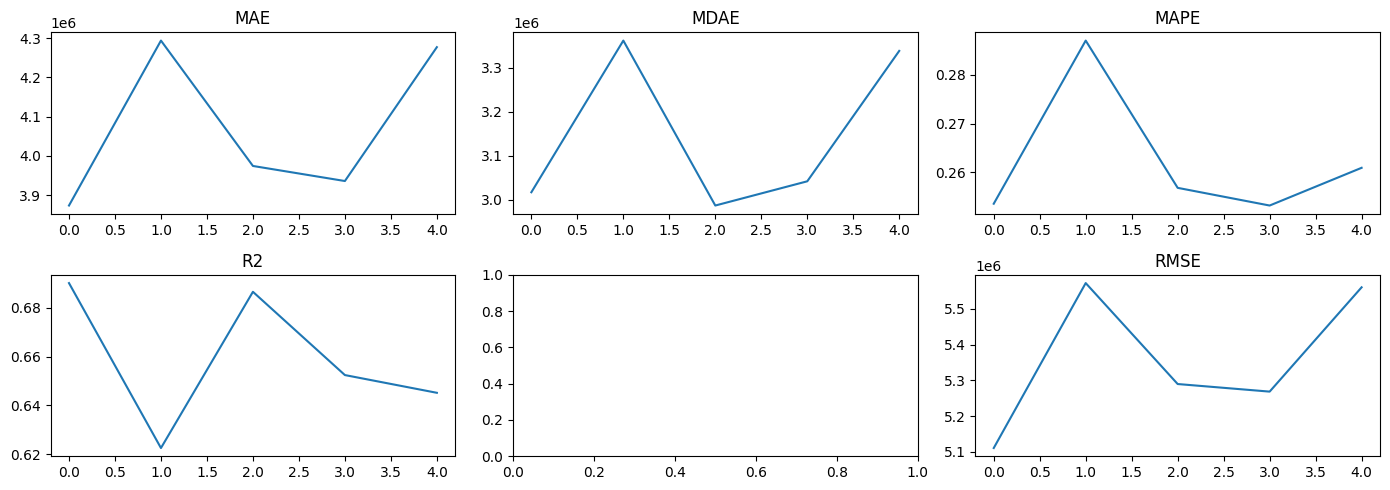

In [518]:
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet, OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor

# model = GradientBoostingRegressor()
# model = MLPRegressor()
model = LGBMRegressor(verbose=0)
# model = Ridge()
# model = RandomForestRegressor()
# model = CatBoostRegressor(verbose=0)
# model = LinearRegression()
# model = DecisionTreeRegressor()

val_mae, val_mdae, val_mape, val_r2, val_rmse = model_cv(
    model, 
    X_train,
    y_train,
    X_test,
    y_test,
    return_predictions=False
)

In [226]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


LGBMRegressor(verbose=0)

In [519]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "regression_LGBM_model.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [228]:
with open(model_pkl_file, 'rb') as file:  
    model_ = pickle.load(file)

In [507]:
def select_unique_themes(lst):
    return np.unique(lst)
themes = video_data.pivot_table(index='video_theme', values='video_categoryType', aggfunc=list)
themes['video_categoryType'].apply(select_unique_themes)

video_theme
Animals                                            [113.0]
Anime and comics                                   [100.0]
Beauty and care                             [102.0, 110.0]
Cars                                        [103.0, 115.0]
Drama                                [101.0, 105.0, 108.0]
Education                            [101.0, 114.0, 116.0]
Everyday life          [102.0, 103.0, 105.0, 109.0, 120.0]
Family                                             [106.0]
Fashionable looks                                  [109.0]
Fitness and health                                 [117.0]
Food                                               [111.0]
Games                                              [103.0]
Humor                                       [101.0, 104.0]
LipSync                                            [110.0]
Relationship           [101.0, 102.0, 107.0, 109.0, 120.0]
Show                                               [101.0]
Singing and dancing                  [104.0,

In [510]:
themes_dict = {}
for theme in video_data['video_theme'].unique():
    themes_dict[theme] = video_data[video_data['video_theme'] == theme]['video_categoryType'].value_counts().index[0]
    print('Theme: {}, Type: {}'.format(theme, video_data[video_data['video_theme'] == theme]['video_categoryType'].value_counts().index[0]))

Theme: Singing and dancing, Type: 119.0
Theme: Humor, Type: 104.0
Theme: Sport, Type: 112.0
Theme: Anime and comics, Type: 100.0
Theme: Relationship, Type: 107.0
Theme: Show, Type: 101.0
Theme: LipSync, Type: 110.0
Theme: Everyday life, Type: 105.0
Theme: Beauty and care, Type: 102.0
Theme: Games, Type: 103.0
Theme: Society, Type: 114.0
Theme: Fashionable looks, Type: 109.0
Theme: Cars, Type: 115.0
Theme: Food, Type: 111.0
Theme: Animals, Type: 113.0
Theme: Family, Type: 106.0
Theme: Drama, Type: 108.0
Theme: Fitness and health, Type: 117.0
Theme: Education, Type: 116.0
Theme: Technologies, Type: 118.0


In [511]:
themes_dict

{'Singing and dancing': 119.0,
 'Humor': 104.0,
 'Sport': 112.0,
 'Anime and comics': 100.0,
 'Relationship': 107.0,
 'Show': 101.0,
 'LipSync': 110.0,
 'Everyday life': 105.0,
 'Beauty and care': 102.0,
 'Games': 103.0,
 'Society': 114.0,
 'Fashionable looks': 109.0,
 'Cars': 115.0,
 'Food': 111.0,
 'Animals': 113.0,
 'Family': 106.0,
 'Drama': 108.0,
 'Fitness and health': 117.0,
 'Education': 116.0,
 'Technologies': 118.0}

In [556]:
import joblib
scaler_filename = "StandardScaler_.save"
joblib.dump(scaler, scaler_filename)

['StandardScaler_.save']

In [344]:
preds = 2 ** model.predict(X_test)

In [345]:
r2_score(2 ** y_test, preds)

0.6523166555875191

<Axes: >

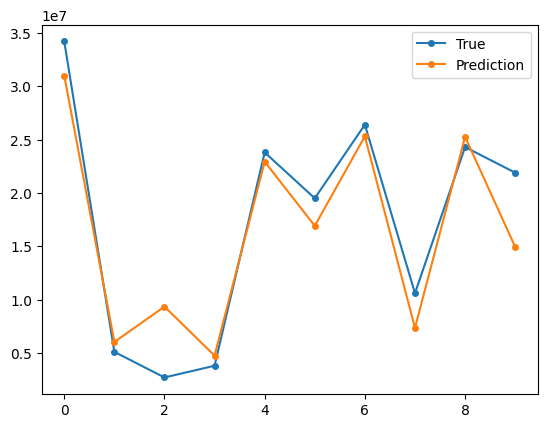

In [346]:
prds = pd.DataFrame({'True': 2 ** y_test, 'Prediction': preds})
prds.sample(10).reset_index(drop=True).plot(kind='line', marker='o', markersize=4)

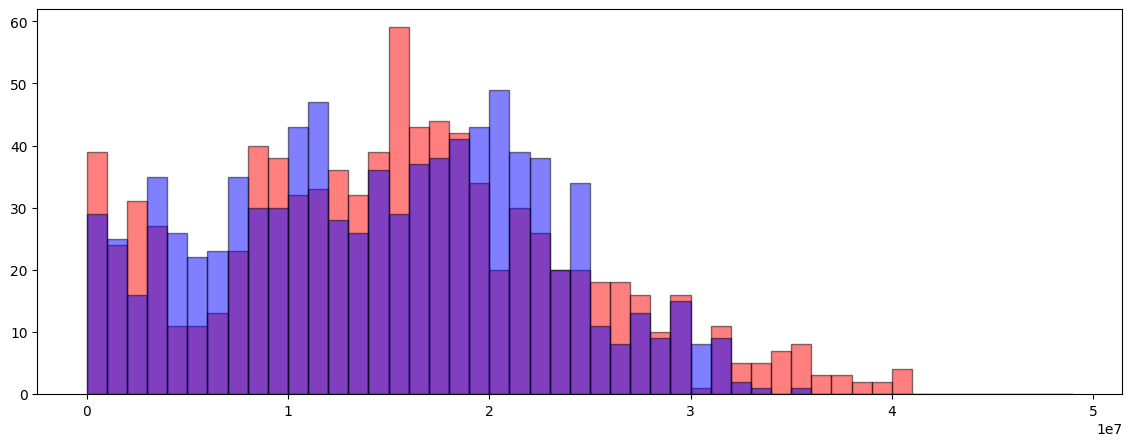

In [128]:
plt.figure(figsize=(14, 5))
bins = [x for x in range(0, 50000000, 1000000)]
plt.hist(prds['True'], color='red', ec='black', alpha=0.5, bins=bins)
plt.hist(prds['Prediction'], color='blue', ec='black', alpha=0.5, bins=bins);

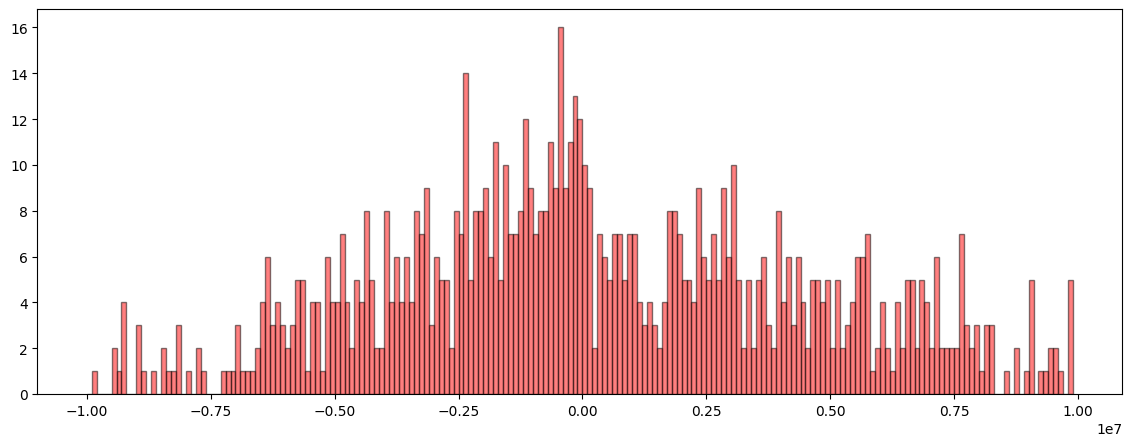

In [129]:
plt.figure(figsize=(14, 5))
bins = [x for x in range(-10000000, 10000000, 100000)]
plt.hist((prds['True'] - prds['Prediction']), color='red', ec='black', alpha=0.5, bins=bins);

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20, 4))
# prds.reset_index(drop=True).plot(kind='bar', ax=axs)
prds.sort_values(by='True').reset_index(drop=True).plot(kind='line', marker='o', markersize=4, ax=axs)

<Axes: >

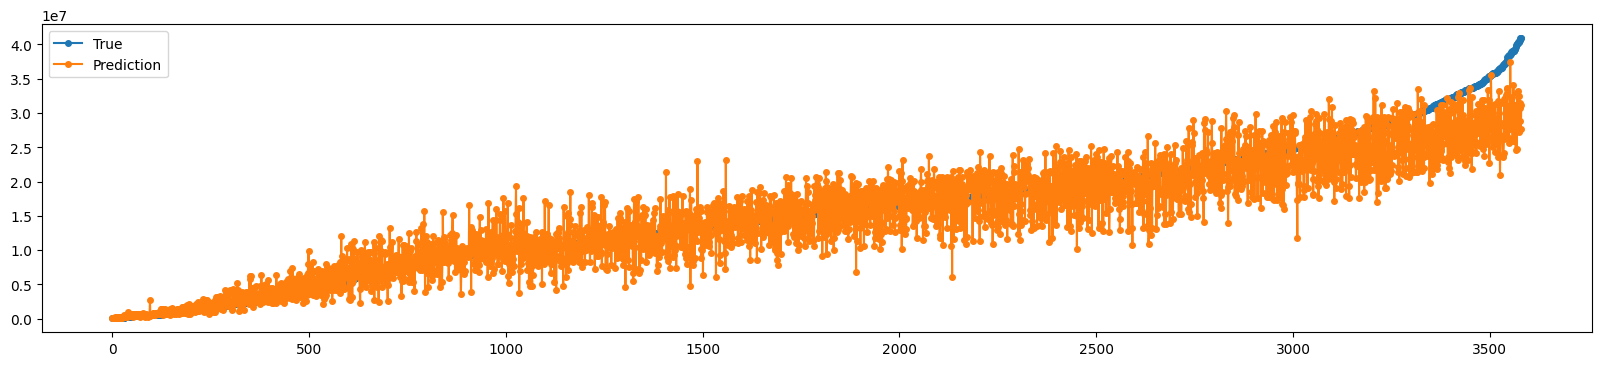

In [343]:
fig, axs = plt.subplots(1, 1, figsize=(20, 4))
# prds.reset_index(drop=True).plot(kind='bar', ax=axs)
prds.sort_values(by='True').reset_index(drop=True).plot(kind='line', marker='o', markersize=4, ax=axs)

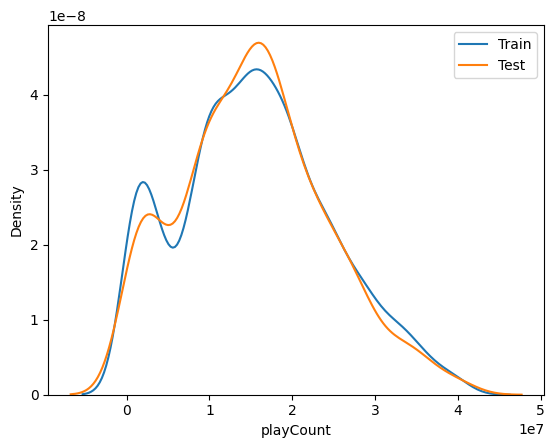

In [198]:
import seaborn as sns
sns.kdeplot(2 ** y_train, label='Train')
sns.kdeplot(2 ** y_test, label='Test')
plt.legend()

## Hyperparameters Searching with Optuna

In [130]:
import lightgbm as lgb
lgb.__version__

'4.6.0'

In [499]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import optuna

def c_r2(y_true, y_pred):
    y_true = 2 ** y_true
    y_pred = 2 ** y_pred
    return r2_score(y_true, y_pred)

# scorer_ = {'c_mae': make_scorer(c_mae, greater_is_better=False)}
scorer_ = {'c_r2': make_scorer(c_r2, greater_is_better=True)}

# 1. Define an objective function to be maximized.
def objective(trial):
    global X, y
    param = {
        # 'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        # 'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        # 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        # 'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        # 'max_depth': trial.suggest_int('max_depth', 0, 300),
        # 'min_samples_split': trial.suggest_float('min_samples_split', 0.01, 0.99),
        # 'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.99),
        # 'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 1, 100)
        # 'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.10, 0.99)
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 10, 500),
        'max_depth': trial.suggest_int('max_depth', -1, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.000005, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 3, 500),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 200000, 1000000),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.8),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 20.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 500),
        # 'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 0.9),
        # 'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10000.0),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10000.0)
    }
    
    model = LGBMRegressor(
        **param, verbose=-1, verbose_eval=-1
    )
    
    
    
    scores_ = cross_validate(model, X_train, y_train, scoring=scorer_,
                            cv=5)
    # print(scores)
    tmae = np.mean(scores_['test_c_r2'])
    return tmae

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, timeout=600)

[I 2025-06-01 15:56:30,071] A new study created in memory with name: no-name-63d76ee0-e25c-40cd-8398-95b0a4cd9b6d
[I 2025-06-01 15:56:32,653] Trial 0 finished with value: 0.5260291309353524 and parameters: {'boosting_type': 'dart', 'num_leaves': 195, 'max_depth': 83, 'learning_rate': 0.18357478772959218, 'n_estimators': 436, 'subsample_for_bin': 639502, 'min_split_gain': 0.2452580670703661, 'min_child_weight': 0.8593342365760525, 'min_child_samples': 118, 'colsample_bytree': 0.8456519889886311}. Best is trial 0 with value: 0.5260291309353524.
[I 2025-06-01 15:56:33,292] Trial 1 finished with value: 0.4436966502148102 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 288, 'max_depth': 18, 'learning_rate': 0.09616484346137613, 'n_estimators': 405, 'subsample_for_bin': 742948, 'min_split_gain': 0.15397734537080449, 'min_child_weight': 7.04890760022286, 'min_child_samples': 181, 'colsample_bytree': 0.2063749897120391}. Best is trial 0 with value: 0.5260291309353524.
[I 2025-06-01 15:

[I 2025-06-01 15:56:57,133] Trial 19 finished with value: 0.5795538954159023 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 417, 'max_depth': 17, 'learning_rate': 0.15377118178767618, 'n_estimators': 194, 'subsample_for_bin': 326639, 'min_split_gain': 0.3431023184164642, 'min_child_weight': 15.40866295957343, 'min_child_samples': 73, 'colsample_bytree': 0.5170376315166498}. Best is trial 19 with value: 0.5795538954159023.
[I 2025-06-01 15:56:57,594] Trial 20 finished with value: 0.5687825923350203 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 420, 'max_depth': 26, 'learning_rate': 0.1604446624445792, 'n_estimators': 170, 'subsample_for_bin': 561640, 'min_split_gain': 0.5079097824842025, 'min_child_weight': 16.872648245215665, 'min_child_samples': 68, 'colsample_bytree': 0.3290502673229483}. Best is trial 19 with value: 0.5795538954159023.
[I 2025-06-01 15:56:58,347] Trial 21 finished with value: 0.5162087784394904 and parameters: {'boosting_type': 'gbdt', 'num_leaves

[I 2025-06-01 15:57:09,183] Trial 38 finished with value: 0.5683308144582032 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 459, 'max_depth': 15, 'learning_rate': 0.07648049291512815, 'n_estimators': 229, 'subsample_for_bin': 244786, 'min_split_gain': 0.2780345447102199, 'min_child_weight': 9.580313119687796, 'min_child_samples': 86, 'colsample_bytree': 0.655831361257873}. Best is trial 34 with value: 0.6652995675370212.
[I 2025-06-01 15:57:09,856] Trial 39 finished with value: 0.5522964953979874 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 471, 'max_depth': 54, 'learning_rate': 0.09447680717187835, 'n_estimators': 179, 'subsample_for_bin': 614430, 'min_split_gain': 0.16351922658713783, 'min_child_weight': 13.22805347354829, 'min_child_samples': 141, 'colsample_bytree': 0.8285948877356911}. Best is trial 34 with value: 0.6652995675370212.
[I 2025-06-01 15:57:10,419] Trial 40 finished with value: 0.6355422870216554 and parameters: {'boosting_type': 'gbdt', 'num_leave

[I 2025-06-01 15:57:21,156] Trial 57 finished with value: -1.575152012168325 and parameters: {'boosting_type': 'dart', 'num_leaves': 438, 'max_depth': 6, 'learning_rate': 0.14800469077981784, 'n_estimators': 69, 'subsample_for_bin': 350331, 'min_split_gain': 0.625654534595584, 'min_child_weight': 8.881832552960317, 'min_child_samples': 75, 'colsample_bytree': 0.7384940955662566}. Best is trial 34 with value: 0.6652995675370212.
[I 2025-06-01 15:57:21,847] Trial 58 finished with value: 0.6609554328670739 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 192, 'max_depth': 80, 'learning_rate': 0.06799763697058006, 'n_estimators': 61, 'subsample_for_bin': 710181, 'min_split_gain': 0.45312709227330683, 'min_child_weight': 11.84697446094667, 'min_child_samples': 22, 'colsample_bytree': 0.6902444731278725}. Best is trial 34 with value: 0.6652995675370212.
[I 2025-06-01 15:57:22,100] Trial 59 finished with value: 0.5072710297303986 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 

[I 2025-06-01 15:57:37,816] Trial 76 finished with value: 0.6440824972754404 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 164, 'max_depth': 90, 'learning_rate': 0.025387084343717014, 'n_estimators': 199, 'subsample_for_bin': 887313, 'min_split_gain': 0.5126127387287017, 'min_child_weight': 18.76081853837881, 'min_child_samples': 75, 'colsample_bytree': 0.7494924263446374}. Best is trial 63 with value: 0.6665019785463603.
[I 2025-06-01 15:57:38,622] Trial 77 finished with value: 0.6431566196871209 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 109, 'max_depth': 86, 'learning_rate': 0.051968854719110544, 'n_estimators': 214, 'subsample_for_bin': 883429, 'min_split_gain': 0.5444492165714487, 'min_child_weight': 19.40315461664877, 'min_child_samples': 42, 'colsample_bytree': 0.7986244127336438}. Best is trial 63 with value: 0.6665019785463603.
[I 2025-06-01 15:57:41,988] Trial 78 finished with value: 0.6550749987475608 and parameters: {'boosting_type': 'gbdt', 'num_leav

[I 2025-06-01 15:58:06,091] Trial 95 finished with value: 0.6522587553543181 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 258, 'max_depth': 100, 'learning_rate': 0.019676714766263648, 'n_estimators': 176, 'subsample_for_bin': 905531, 'min_split_gain': 0.4801368409493566, 'min_child_weight': 18.484938283819552, 'min_child_samples': 60, 'colsample_bytree': 0.753214666767085}. Best is trial 82 with value: 0.6670087777585384.
[I 2025-06-01 15:58:09,002] Trial 96 finished with value: 0.6278106819146444 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 226, 'max_depth': 85, 'learning_rate': 0.009981714965579425, 'n_estimators': 203, 'subsample_for_bin': 967267, 'min_split_gain': 0.5976935842730308, 'min_child_weight': 17.20946149954978, 'min_child_samples': 2, 'colsample_bytree': 0.718602266891397}. Best is trial 82 with value: 0.6670087777585384.
[I 2025-06-01 15:58:10,696] Trial 97 finished with value: 0.02397870538872162 and parameters: {'boosting_type': 'gbdt', 'num_leav

[I 2025-06-01 15:58:27,563] Trial 114 finished with value: 0.6485039834579495 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 277, 'max_depth': 60, 'learning_rate': 0.028429912942964018, 'n_estimators': 268, 'subsample_for_bin': 814281, 'min_split_gain': 0.6844463561315761, 'min_child_weight': 13.712276632389816, 'min_child_samples': 48, 'colsample_bytree': 0.8785526935844452}. Best is trial 102 with value: 0.6685851180576082.
[I 2025-06-01 15:58:29,343] Trial 115 finished with value: 0.6617926140823632 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 303, 'max_depth': 58, 'learning_rate': 0.013454933841881296, 'n_estimators': 267, 'subsample_for_bin': 824651, 'min_split_gain': 0.6440105220207661, 'min_child_weight': 12.910986545802464, 'min_child_samples': 39, 'colsample_bytree': 0.8149333933877321}. Best is trial 102 with value: 0.6685851180576082.
[I 2025-06-01 15:58:30,451] Trial 116 finished with value: 0.6662155401705064 and parameters: {'boosting_type': 'gbdt', 'n

[I 2025-06-01 15:58:51,117] Trial 133 finished with value: 0.6716945410955103 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 297, 'max_depth': 37, 'learning_rate': 0.058685014560130214, 'n_estimators': 370, 'subsample_for_bin': 687468, 'min_split_gain': 0.7776832344510088, 'min_child_weight': 11.112837396118069, 'min_child_samples': 2, 'colsample_bytree': 0.8985645620706013}. Best is trial 128 with value: 0.6730477828055402.
[I 2025-06-01 15:58:52,157] Trial 134 finished with value: 0.6710477274057266 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 293, 'max_depth': 38, 'learning_rate': 0.05833555822622919, 'n_estimators': 389, 'subsample_for_bin': 653104, 'min_split_gain': 0.7785682865092192, 'min_child_weight': 11.139163204767263, 'min_child_samples': 8, 'colsample_bytree': 0.8962431237937083}. Best is trial 128 with value: 0.6730477828055402.
[I 2025-06-01 15:58:53,225] Trial 135 finished with value: 0.6720874493212776 and parameters: {'boosting_type': 'gbdt', 'num_

[I 2025-06-01 15:59:14,720] Trial 152 finished with value: 0.6688787973604003 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 265, 'max_depth': 35, 'learning_rate': 0.07238181177517601, 'n_estimators': 471, 'subsample_for_bin': 677560, 'min_split_gain': 0.798241004655559, 'min_child_weight': 9.235332968962176, 'min_child_samples': 13, 'colsample_bytree': 0.8749570011236733}. Best is trial 145 with value: 0.6740047669227575.
[I 2025-06-01 15:59:15,691] Trial 153 finished with value: 0.6717818681141164 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 285, 'max_depth': 33, 'learning_rate': 0.0619538375507435, 'n_estimators': 439, 'subsample_for_bin': 635766, 'min_split_gain': 0.7820792539456184, 'min_child_weight': 11.337304232858289, 'min_child_samples': 11, 'colsample_bytree': 0.856803880301688}. Best is trial 145 with value: 0.6740047669227575.
[I 2025-06-01 15:59:16,660] Trial 154 finished with value: 0.6702480412687108 and parameters: {'boosting_type': 'gbdt', 'num_lea

[I 2025-06-01 15:59:31,375] Trial 171 finished with value: 0.6748835116876969 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 275, 'max_depth': 35, 'learning_rate': 0.05916567012645524, 'n_estimators': 489, 'subsample_for_bin': 687647, 'min_split_gain': 0.7835389122534419, 'min_child_weight': 10.456657458254156, 'min_child_samples': 11, 'colsample_bytree': 0.8462639750618596}. Best is trial 171 with value: 0.6748835116876969.
[I 2025-06-01 15:59:32,322] Trial 172 finished with value: 0.6695936880758374 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 275, 'max_depth': 35, 'learning_rate': 0.06371768866207621, 'n_estimators': 500, 'subsample_for_bin': 641904, 'min_split_gain': 0.7835695202478723, 'min_child_weight': 10.368961059781025, 'min_child_samples': 13, 'colsample_bytree': 0.851428427801821}. Best is trial 171 with value: 0.6748835116876969.
[I 2025-06-01 15:59:33,192] Trial 173 finished with value: 0.6360956411390023 and parameters: {'boosting_type': 'gbdt', 'num_

[I 2025-06-01 15:59:53,057] Trial 190 finished with value: 0.6660737254590192 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 286, 'max_depth': 35, 'learning_rate': 0.056698168374605715, 'n_estimators': 482, 'subsample_for_bin': 667275, 'min_split_gain': 0.7521322564311141, 'min_child_weight': 11.193272400871468, 'min_child_samples': 18, 'colsample_bytree': 0.8997390332323993}. Best is trial 181 with value: 0.6749023650052014.
[I 2025-06-01 15:59:54,117] Trial 191 finished with value: 0.6722485937258648 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 314, 'max_depth': 36, 'learning_rate': 0.05990670536648189, 'n_estimators': 415, 'subsample_for_bin': 644785, 'min_split_gain': 0.7994023721324813, 'min_child_weight': 10.704407807272554, 'min_child_samples': 8, 'colsample_bytree': 0.8810680067197965}. Best is trial 181 with value: 0.6749023650052014.
[I 2025-06-01 15:59:55,273] Trial 192 finished with value: 0.6707593478258286 and parameters: {'boosting_type': 'gbdt', 'num

In [498]:
# 3932339.54869072
study.best_params

{'boosting_type': 'gbdt',
 'num_leaves': 444,
 'max_depth': 76,
 'learning_rate': 0.012837796635394527,
 'n_estimators': 434,
 'subsample_for_bin': 742435,
 'min_split_gain': 0.7731360922960083,
 'min_child_weight': 1.7733469148132044,
 'min_child_samples': 11,
 'colsample_bytree': 0.7871827770318691}

In [495]:
# 3940707
study.best_params

{'boosting_type': 'gbdt',
 'num_leaves': 314,
 'max_depth': 59,
 'learning_rate': 0.017930694341155337,
 'n_estimators': 289,
 'subsample_for_bin': 801108,
 'min_split_gain': 0.7978876323605631,
 'min_child_weight': 4.054787993006893,
 'min_child_samples': 10,
 'colsample_bytree': 0.8309626103836678}

In [492]:
# 3969142.0683028116
study.best_params

{'boosting_type': 'gbdt',
 'num_leaves': 111,
 'max_depth': 95,
 'learning_rate': 0.03159921037595614,
 'n_estimators': 148,
 'subsample_for_bin': 264281,
 'min_split_gain': 0.5086951052969323,
 'min_child_weight': 1.7992921119195302,
 'min_child_samples': 10,
 'subsample': 0.20254288430089917,
 'colsample_bytree': 0.7913367436637504}

In [488]:
# 4004000
study.best_params

{'boosting_type': 'gbdt',
 'num_leaves': 405,
 'max_depth': 9,
 'learning_rate': 0.02716909560065559,
 'n_estimators': 172}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

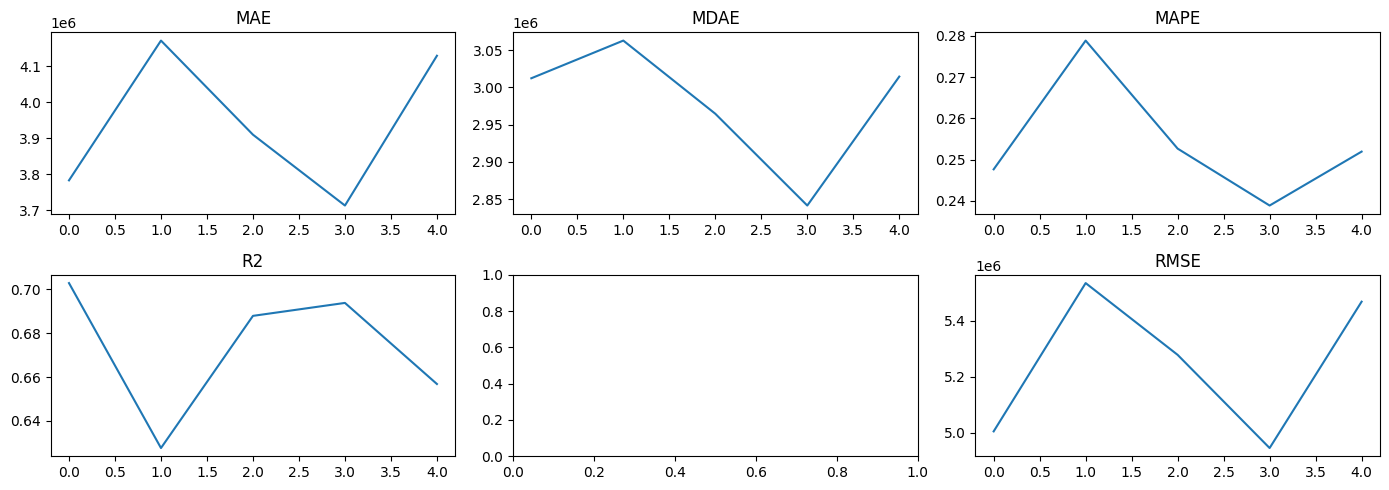

In [500]:
from lightgbm import LGBMRegressor

bst_params = {'boosting_type': 'gbdt',
 'num_leaves': 314,
 'max_depth': 59,
 'learning_rate': 0.017930694341155337,
 'n_estimators': 289,
 'subsample_for_bin': 801108,
 'min_split_gain': 0.7978876323605631,
 'min_child_weight': 4.054787993006893,
 'min_child_samples': 10,
 'colsample_bytree': 0.8309626103836678}

model = LGBMRegressor(**bst_params, verbose=0)
# model = RandomForestRegressor()
# model = LinearRegression()

val_mae, val_mdae, val_mape, val_r2, val_rmse = model_cv(
    model, 
    X_train,
    y_train,
    X_test,
    y_test,
    return_predictions=False
)

In [501]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "regression_LGBM_model_v2.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

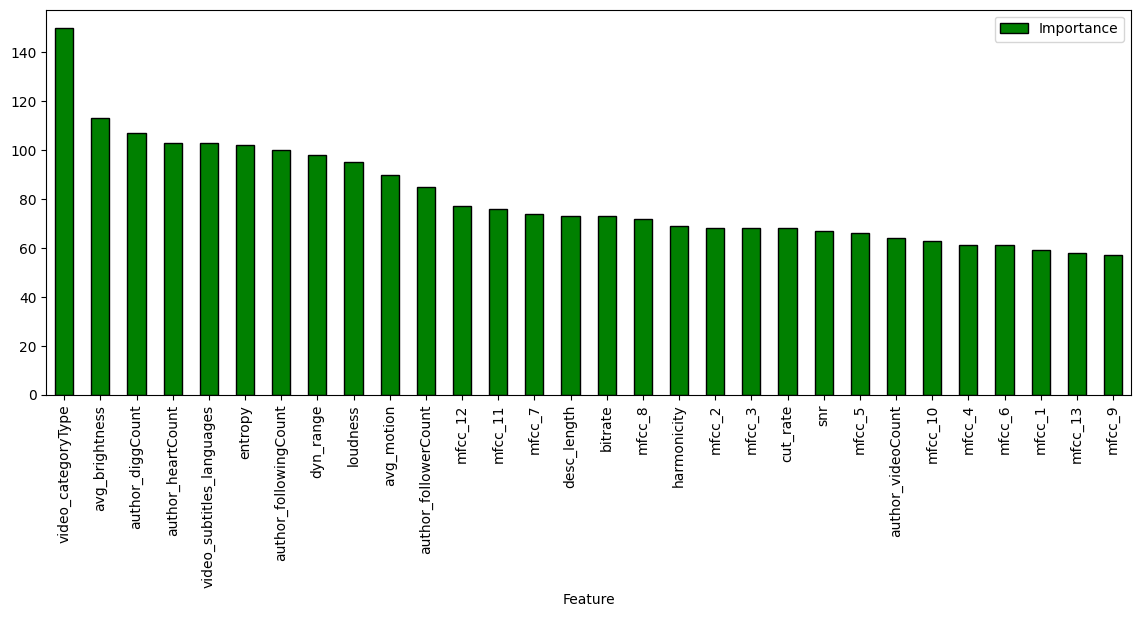

In [592]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False).head(30).set_index('Feature').plot(kind='bar', ax=axs, color='green', ec='black');